# Week 8 Problem 3

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select *Kernel*, and restart the kernel and run all cells (*Restart & Run all*).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select *File* → *Save and CheckPoint*)

5. When you are ready to submit your assignment, go to *Dashboard* → *Assignments* and click the *Submit* button. Your work is not submitted until you click *Submit*.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. **If your code does not pass the unit tests, it will not pass the autograder.**

# Due Date: 6 PM, March 12, 2018

## Author: Kelechi Ikegwu
### Primary Reviewer: Radhir Kothuri

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn as sk
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from nose.tools import assert_equal, assert_true, assert_false, assert_almost_equal
import numpy.testing as npt

### Problem 3.1

Complete the *read* function below by reading in the data from the function parameter path. Return data from columns *a, b, and c* as a pandas dataframe.

In [25]:
def read(path):
    '''
    Parameters
    ----------
    path: string containing path to a dataset
    
    Returns
    -------
    Pandas dataframe containing simulated features  
    '''
    # YOUR CODE HERE
    # read in data seperated by comma
    data = pd.read_csv(path)
    
    # slice dataframe and return
    return data.loc[:,['a','b','c']]

In [26]:
data = read('/home/data_scientist/data/misc/sim.data')

assert_false(data.shape == (1000,4), msg="Do not include the labels.")
assert_equal(data.shape, (1000, 3))
assert_equal(set(['a', 'b', 'c']), set(data.columns.values), "the column names of the features should be a, b, and c")

# Checking the 1st, middle and last 10 values
npt.assert_almost_equal(data['a'][0:10].values, [0.004538756278022693, 0.001367180229782946, 1.579454490589817, 7.189778340772055, 97.74363378563841, 231.3285868191706, 16.3679230579562, 34.43278065945885, 1.0990698634870093, 87.6032162115782], decimal=2)
npt.assert_almost_equal(data['b'][0:10].values, [0.8186782999500359, 0.2437237417185819, 0.4658422528442043, 0.4568947468139637, 0.31941856169613114, 0.684927600189631, 0.31692467015098197, 0.6737290314590154, 0.1747144659552744, 0.18146985080608014], decimal=2)
npt.assert_almost_equal(data['c'][0:10].values, [194.3818914465897, 245.3785765268093, 849.9435826475784, 129.70793164371412, 120.99829401723468, 891.5962584231169, 405.49133700880805, 0.7615564526110772, 996.1788073651718, 652.5194941922284], decimal=2)

npt.assert_almost_equal(data['a'][500:510].values, [189.95395883964773, 8.134208503751116, 68.18663142029446, 21.07373611994852, 8.754515625948642, 196.07028115076744, 17.501961948501748, 38.85929423656764, 7.76387787211254, 0.0002608864100918404], decimal=2)
npt.assert_almost_equal(data['b'][500:510].values, [0.8957927034543847, 0.8056358882489768, 0.4217377180797413, 0.9699033436263548, 0.9110696410411628, 0.009702769635210329, 0.6498695753307416, 0.6275423440237563, 0.6898229049091713, 0.3316301688237832], decimal=2)
npt.assert_almost_equal(data['c'][500:510].values, [369.2409384480051, 52.928470510286, 877.0868644248271, 27.140556115196613, 126.32184032639526, 325.7330743672124, 359.6056228292598, 402.45752139613967, 174.1724712561158, 725.9530257588764], decimal=2)

npt.assert_almost_equal(data['a'][989:999].values, [39.5058596726601, 32.939625296572736, 238.27939965561242, 115.69527370867027, 0.007045598085451298, 42.979147662645175, 0.12696914419660302, 42.84543964558405, 15.243814032851011, 0.8429799771525917], decimal=2)
npt.assert_almost_equal(data['b'][989:999].values, [0.8030685096611125, 0.290398711192725, 0.5671075671551059, 0.5640618434812261, 0.15075732495332206, 0.2457006478416667, 0.3941078904645844, 0.6011828415195108, 0.704389596992097, 0.6199295527181631], decimal=2)
npt.assert_almost_equal(data['c'][989:999].values, [576.7021077213268, 401.4262478777826, 953.5581688422352, 815.6610852450333, 464.5952161465464, 691.6443974925519, 374.83687524084314, 547.2114799034326, 126.0863003970656, 41.33269322524603], decimal=2)

# checking entire dataset
npt.assert_almost_equal(data, [[0.004538756278022693, 0.8186782999500359, 194.3818914465897], [0.001367180229782946, 0.2437237417185819, 245.3785765268093], [1.579454490589817, 0.4658422528442043, 849.9435826475784], [7.189778340772055, 0.4568947468139637, 129.70793164371412], [97.74363378563841, 0.31941856169613114, 120.99829401723468], [231.3285868191706, 0.684927600189631, 891.5962584231169], [16.3679230579562, 0.31692467015098197, 405.49133700880805], [34.43278065945885, 0.6737290314590154, 0.7615564526110772], [1.0990698634870093, 0.1747144659552744, 996.1788073651718], [87.6032162115782, 0.18146985080608014, 652.5194941922284], [13.582914921592831, 0.07318956559706169, 0.7521355241016677], [4.931004802078643, 0.187316313898826, 90.69507359491364], [104.89883234195077, 0.21479307210299248, 126.80398729667982], [22.358693818267213, 0.949808166878686, 0.13527322550004153], [3.853032853381473, 0.4449389026837537, 712.9274294772539], [209.9228860816152, 0.8211786321941189, 177.1701816117102], [2.205084524558381, 0.1408113748875668, 20.565528109955615], [141.09128919816078, 0.13906712952973355, 0.2836571289448828], [0.7359575546662195, 0.5731077144361473, 475.6588981039064], [0.7569386985778209, 0.5842940679397546, 184.52853221916504], [33.25695777125472, 0.474706834788557, 457.3686443788465], [179.69396046769668, 0.6109770524721676, 838.4509570864475], [3.1509633352414843, 0.044386256815019176, 270.263945124264], [202.95932798304256, 0.2621061886064177, 973.8425864546954], [0.6818485753427834, 0.16393827330710664, 832.670187607016], [50.49686908010725, 0.2509281651027556, 287.21952284472707], [26.110954532979843, 0.6561860778391996, 106.31746766902279], [78.37423552238937, 0.7904166217131681, 355.8920118591031], [230.86188098912038, 0.7373733151661731, 75.53883322042786], [0.4308805497825735, 0.2456062564777973, 930.1160003226524], [3.3319049404434913, 0.06101948491007525, 443.1595513219892], [0.8721041687452206, 0.3436236719932864, 0.03469681952671639], [127.53227824859025, 0.1963766936253779, 169.10811679123262], [1.9076303044955492, 0.7553974130732423, 283.7027516752177], [114.30039731881337, 0.8681823427444103, 0.400926686708481], [72.0156974643518, 0.8394377418148743, 557.0081426445241], [82.51324464361761, 0.12049118130892167, 648.4550479818945], [0.2008610807160416, 0.5053080914260979, 10.113840248444175], [3.351079274990697, 0.7842804122382216, 513.2773197297505], [12.935884112855618, 0.9687402285630752, 250.21637394966638], [9.383512570794231, 0.32245102584748275, 9.447864405736542], [115.68510627418227, 0.39783817847622, 515.5073346659568], [37.35928666551175, 0.3535625968219499, 0.3574448733014151], [0.06409398327956044, 0.6798431534028511, 92.29195159603815], [2.023601305219782, 0.6114548123551522, 719.2396266278764], [90.0312389372951, 0.5914799339406179, 523.5194235281675], [78.68878825135994, 0.22361068850180546, 71.91172740460595], [74.29295024478296, 0.2349471550392469, 681.6578214377105], [157.34979462808562, 0.11888036042732684, 447.0143132417466], [48.38192877969401, 0.9756281623775565, 952.1012989829206], [182.98911503039483, 0.5089910534933696, 55.544978542878816], [11.648062721172593, 0.5961486900519786, 576.7446163606097], [4.382905833504636, 0.3929409049332632, 934.0577073937268], [82.77535499769081, 0.4213032668521237, 0.19725264671054435], [140.91432686711573, 0.21469303581639976, 377.8012622890415], [11.15773284098551, 0.2530268014096988, 458.0829670773958], [0.015310069888579662, 0.6974934602589165, 162.85318128016112], [81.65870471173025, 0.847348572259948, 3.754500545250036], [118.23540639061173, 0.5502058148037439, 366.27267764111497], [228.00481332998277, 0.5177112728316966, 441.88844892430717], [4.144072978355288, 0.12370711382009734, 358.71466506941863], [1.8618167908847287, 0.08228074211577951, 368.87119739123494],
                               [52.723115372772895, 0.8673460436798632, 241.79493303558831], [99.15997498146696, 0.6804610139755086, 377.8346553956918], [199.062366251032, 0.9208004994975582, 791.0696032689793], [167.3399435517217, 0.9820533370558644, 969.7511467801808], [70.93113624785119, 0.017520534400796706, 651.0003780635791], [57.97238072008847, 0.624883158481001, 713.5048505184918], [48.834968949045155, 0.5112119428664992, 617.9403402471995], [3.4518923137978077, 0.7720068649806701, 129.40201509443787], [90.67239699325356, 0.5446790350987514, 272.9442327993126], [161.49623592342368, 0.41773713558262, 595.6529032931335], [99.89061789695928, 0.7780142832596556, 209.18084401820005], [20.814468397445125, 0.052820249178897605, 503.2575806703196], [2.6832405657164933, 0.17839075866063125, 458.7335604548585], [10.457617018595586, 0.873844443387817, 118.28555672167528], [0.0139865172207099, 0.33066019825880266, 111.94781914428415], [0.3985897265460404, 0.2440770292940925, 108.84922166980715], [9.56640558514689, 0.7416606104891816, 168.95014197180913], [87.27853402948118, 0.9787254767961664, 10.853484301761815], [9.246543546889297, 0.6231543679933838, 23.00904569615373], [219.4532030607709, 0.818952102022658, 65.92095997998098], [0.6120029370138983, 0.2686387566127028, 252.3743997704712], [11.675651057865196, 0.7770197755469476, 884.7936164677243], [4.727899985848792e-06, 0.4084335243122916, 882.6903424214682], [0.19339564706666346, 0.3924401686723133, 350.312063581048], [110.08156591464649, 0.11486954730453712, 307.66644215028936], [19.437101135937084, 0.021575239842437918, 798.2628128457046], [3.0707056279336893, 0.7347482544817936, 6.2144155908183825], [162.99555002289372, 0.6328659389435556, 522.3023252479962], [236.14813331456833, 0.7224569352345201, 732.5254236610582], [66.99747629001168, 0.536708687724502, 19.065911080922483], [114.5717470241453, 0.8563802694981194, 556.2188241654065], [95.5764754155417, 0.54419183819426, 534.4354996183665], [0.0007473827076550832, 0.6817707514915311, 260.3370673857213], [158.39658424649738, 0.9569085474856672, 368.4393176014766], [3.1577358032908047, 0.9907713834808812, 13.219547670254851], [33.10193562622364, 0.3570854418570637, 646.8558118456739], [3.969706605098216, 0.2034146207433252, 752.5552645116832], [173.714350492868, 0.3991367975325871, 563.7842225089282], [46.7377218865481, 0.04646758385664729, 199.2181760163504], [67.36293615692098, 0.02559510221516359, 389.4528514431839], [38.28300015885993, 0.06824179187001911, 3.6682882161704664], [147.65602754546117, 0.3855741772197363, 93.6959244389005], [147.97320656066856, 0.5377130029524982, 123.14078435966098], [34.33323340767528, 0.688790926546495, 74.62526864630448], [61.8804735363424, 0.4819229889498663, 134.03997762385757], [0.9012985155660198, 0.8769941169058783, 879.6517441984552], [111.9188397571687, 0.8287674180986145, 295.22040864099546], [219.20538279776298, 0.05649760007947724, 75.88055785891375], [23.730865861608766, 0.8805570147354828, 142.68775080145562], [0.04917206109255071, 0.5341265069002916, 612.3666639610185], [3.1586116597523466, 0.7055359618835961, 68.0185343567809], [0.3832201941344036, 0.1109695356864726, 24.312932345642448], [6.307387451261053, 0.22307886169203828, 543.4777453846767], [0.004018014910275272, 0.6418170580913353, 1.2974129779643078], [42.86785719499541, 0.2543090333381421, 492.9041732247733], [108.82040543588936, 0.7248575417245112, 366.1373101419785], [0.05449031161853389, 0.5721154333965207, 486.3410477451813], [57.98242404845559, 0.8733287052159607, 764.5627950346934], [0.00845905242874696, 0.07565048153877019, 430.5000794950888], [69.61440830243889, 0.34510328063214657, 871.8578062306685], [106.62826184625963, 0.5683057623835986, 795.6715266996637], [16.162939519958964, 0.2939311490682759, 76.87030848578306], [96.80736461935692, 0.5707600162894088, 45.50120697631911], [0.02982708632214919, 0.3055955862749742, 2.3409071189263324], [2.3032039757148826, 0.5573670117116569, 20.485637413026737], [1.0359732371903434, 0.7698096393545079, 118.70948354937686], [0.05223221164714866, 0.17345528470014504, 692.1716305987527],
                               [31.21316562039185, 0.6556314982078411, 380.6617427152114], [176.65929204071725, 0.7304829052060726, 6.3097151176529325], [1.3603049453347538, 0.3657824795325403, 43.70089619205901], [6.947259252310732e-05, 0.7613806241689492, 655.1991972680509], [16.859404437520823, 0.7307491716055456, 0.017224103373042792], [34.36775460779387, 0.4606278295198166, 366.86253407482667], [4.79008620824316, 0.5022522563220023, 849.1958536387015], [0.02676235021353895, 0.7582526405331211, 214.55512795538297], [0.4519750099610107, 0.17251630249563898, 105.0230684821176], [21.39952043230861, 0.7420804551959768, 46.40458784835835], [115.38129390476489, 0.06945431451367101, 468.3851926260694], [254.35511345876952, 0.9560529006286844, 104.02434838433287], [92.85126710324585, 0.21731926888812456, 456.3000211260381], [0.9137048265753968, 0.2427510497909039, 804.818906320741], [143.8851336460453, 0.8570919662319336, 16.636251904409445], [223.51492877171242, 0.10937173745911666, 21.8536878822259], [15.60958302344103, 0.4482784122553062, 36.20570412472031], [21.536011988422786, 0.037673547791057804, 1.3965890508023338], [43.55784040097475, 0.2280944537244717, 66.03635942225007], [14.968024460767412, 0.6337582041841081, 462.73889372245725], [0.4655653215654119, 0.6888151399903566, 279.04607755963883], [121.37450897765197, 0.6418776123459273, 235.711647270892], [2.5072323441161948, 0.017747175849017083, 271.11429400440625], [0.13986410154465218, 0.26854193442831165, 464.64465786280266], [49.97401087043025, 0.2810199809207017, 116.78765680677387], [233.09666855746602, 0.6404021463927538, 334.8703057195345], [2.277257810624418, 0.6219312895836494, 3.9536753893663534], [31.58196831373396, 0.2864079308110609, 0.8107754015346671], [226.61758456171, 0.8131698557740016, 538.2719134549667], [1.5352498564829418, 0.4644699531544795, 384.98266608456436], [21.697376846658184, 0.8905941667881458, 102.08644977892469], [3.3001114539223253, 0.8763723146766038, 312.51208871410165], [10.027063252239198, 0.4249216017619452, 65.57951117075915], [10.25325216067991, 0.0011860054661292365, 236.8648239495536], [3.5565897106416564, 0.0866276955426738, 820.5864138901677], [113.57588626896481, 0.996029010055866, 64.69259401703289], [229.16891159576977, 0.1671577615104798, 357.47080112336374], [27.287434522980078, 0.04224769161790798, 21.195870621474388], [5.352502520219205, 0.4943983057217419, 196.86742903982653], [74.6424095497198, 0.961432424649784, 143.6381892176232], [146.23377207802275, 0.8168909174103696, 44.88318865811285], [33.748677072942904, 0.7415736562195505, 33.30457021569166], [221.1298447781576, 0.7410501084999855, 45.61596779070221], [210.74994810939617, 0.2861123002224807, 71.20347389999094], [0.06895936337790037, 0.3186307925365406, 438.4030570057957], [0.2656610587223312, 0.6592093718628302, 9.512453717928485], [12.133649416264074, 0.06357289675936961, 601.2665783090338], [37.44245490129865, 0.30088008374140696, 0.00010182754725419544], [135.24308234199984, 0.3692686787192515, 386.9421892373402], [71.7594575441018, 0.9691368207870512, 369.60663417582407], [131.6737807370354, 0.7423601428970958, 746.364470597083], [12.868739265107894, 0.5634454706460297, 22.69570363096907], [212.50752963989044, 0.03703512840679535, 174.2533527915586], [169.8957342779973, 0.8664328855333236, 230.10304197969762], [184.01838810991018, 0.7949429199665773, 162.32655138319518], [15.68088464465025, 0.5539519232440407, 39.318077664408676], [3.4763177629292947, 0.2443536770227133, 982.9900279212843], [106.8939874493909, 0.580941761809343, 941.2754084425256], [0.032385570836998924, 0.3629001144880486, 227.8991798465548], [23.07219187964836, 0.4218982293837508, 223.1360584259896], [0.30590217368568645, 0.7126408235592789, 244.4537993829763], [30.019309457567676, 0.5403844540834281, 999.1271557649375],
                               [103.76327784957691, 0.5144574128805401, 397.0892958779492], [10.25388853504261, 0.038114271495449666, 659.3212714570733], [246.8351584655904, 0.4679940431376287, 230.19067946309133], [46.805577229116594, 0.27737770544567897, 905.1183946465125], [10.46240789007179, 0.6174703395790516, 667.4051902351762], [224.3108663080431, 0.19760449668451985, 34.93600615596932], [201.65634352207343, 0.2997174450121788, 806.1172389691341], [0.9258929349777364, 0.9951843692276332, 276.84709260548067], [0.0005702864519965723, 0.2811310914011206, 0.10318090221852506], [0.8544663213522862, 0.9194439202748136, 16.051528445673426], [58.004481648517725, 0.1772437400621225, 58.596185986492024], [18.877003417160708, 0.7701457628775066, 16.508811391594687], [3.1685572829771966, 0.9155139553948539, 57.56103502561697], [3.0707780372892364, 0.9573616102706796, 621.2679838142749], [138.57423478217774, 0.039915890350884616, 717.1893511280473], [0.02408652678397809, 0.1550511878128631, 18.41730506359252], [94.37016444487448, 0.8677259138606052, 222.4429511291148], [7.223646013408284, 0.7578333840977299, 65.29091439825135], [125.55518735151516, 0.8107490514620497, 616.1922287793973], [39.33943572197376, 0.2192095646822435, 109.07198033891069], [87.08137984175748, 0.23033862839000696, 16.524415059095098], [214.52625950992496, 0.6477774635026232, 691.3802987183597], [151.823991028305, 0.9579194040039688, 254.2309382836445], [207.5501681316764, 0.37258292746384747, 513.8555526389312], [0.4667448179069029, 0.8433506873837264, 59.48482975270928], [96.6417339437485, 0.2814124712256534, 842.5666746342599], [143.8555038814569, 0.8779333440680971, 664.804995027111], [6.0408065743073704, 0.03546314812695561, 254.88417806927887], [57.28324494795889, 0.08609980415337604, 597.7161926366878], [1.7396417491313616, 0.16631954041233946, 672.2971653440168], [55.2499080985282, 0.05408909216137203, 42.75080386216532], [72.0917764271311, 0.14771775038044588, 493.69721902453455], [92.90144482287224, 0.2803957942382541, 202.6438484653738], [0.007016221318696147, 0.022365060583123157, 193.31200254480808], [37.00484931155208, 0.2937871225396195, 228.2321837562097], [218.4820264291381, 0.6757932907812095, 777.4754187622722], [6.2029218204796654, 0.15695349325518482, 522.0064683602023], [31.31000427217913, 0.6344678711249367, 132.17767463795315], [50.08016659526971, 0.3913638034878033, 16.824834595895624], [53.56009824888444, 0.4518318040759698, 313.24323422928614], [179.26965358463553, 0.21878571792782908, 250.75264808107968], [0.7436092713987941, 0.6672492126794239, 5.054696037335433], [34.34630805258143, 0.05579085099020553, 111.78780029133495], [128.02985234694722, 0.6449793670136281, 100.38971140533978], [0.2939647069293534, 0.3481000600005661, 0.3414472297459297], [101.38596616710652, 0.469385226016065, 979.6366844515624], [3.1908335564054693, 0.8204658089333123, 804.7790077155764], [0.004488856051209124, 0.7045591233987281, 766.1688196550812], [85.18033700521283, 0.04421984822708935, 107.49921735336031], [89.88970609631384, 0.5009595598200448, 188.18190822718185], [1.7263575493667316, 0.585809285306367, 724.5057130931627], [39.36576252540029, 0.8280666871081682, 324.22341837630347], [0.01675960632114904, 0.8889387479398065, 276.6656223019396], [2.750555895556349, 0.8362974239052297, 209.2873649505231], [0.0008680971850620784, 0.4381575551890096, 120.45132736687344], [7.538591921631392, 0.3205517263423956, 2.349637018937752], [0.036228646586118234, 0.4879245162547749, 838.8477615055626], [40.42353374260865, 0.5865310445205532, 353.92819452766815], [1.3736536458893216, 0.32893030003537804, 26.015540946934447], [2.5527597224890948, 0.4428898415291145, 127.224071602995], [0.8342704812184929, 0.7332745611307784, 195.90890063243236], [48.237349811054045, 0.7558162408437118, 266.2159386965361], [35.802417274937795, 0.7701441184137465, 748.1894753767184], [10.223460366561751, 0.09717950986030488, 533.9816323016026],
                               [202.99413216395962, 0.5996221294695855, 0.062057117246290164], [57.13556002283136, 0.5324697903114779, 784.533365817767], [100.35397168007084, 0.04813006360989991, 302.15132413177537], [22.11351013841621, 0.05572215041836237, 479.8189448760383], [53.242769600779326, 0.8953101983236661, 326.02978329636267], [1.0400473255999512, 0.5321290688951211, 567.2815102131266], [86.0847457715603, 0.6894389294590468, 212.67556825139187], [22.45820642080029, 0.4446027804549165, 2.9482712709179815], [60.40647072803645, 0.562852994446365, 75.56648099357919], [0.9183804371213556, 0.08551877789145212, 109.36109905461845], [190.2005094673967, 0.02366813623447617, 148.2863394586506], [4.560995194818563, 0.3784546447024412, 151.72844385091918], [89.50565836967495, 0.4129265565514361, 3.2444867226307097], [5.23137253854499, 0.20843341845105207, 16.58505059174427], [236.01782377896717, 0.1104610832740296, 0.20343172026606693], [38.47464013271585, 0.1455834078629712, 126.6927304721314], [0.3408492616806194, 0.8169489517771001, 994.3732950687287], [13.94121720442854, 0.051913405758377114, 23.796530892800924], [43.33603819165409, 0.9087530355618598, 491.03543949503035], [60.94667568293065, 0.6420539615488274, 15.516976352790758], [102.41448336087481, 0.6452271735180188, 415.09651307246287], [17.99238358371953, 0.23151024686669666, 87.62443832367788], [40.21643324307442, 0.3037516064476509, 125.03441006517916], [5.626185449895879, 0.9636371308577742, 12.837653886785262], [246.18545208181172, 0.8483736919804526, 631.4572294087612], [29.367569471177568, 0.5672786079111585, 20.456943447829016], [149.94868341096873, 0.806367922345895, 909.179391436586], [3.6842698810508914, 0.17139398378741233, 92.50886718470687], [0.18618076237444695, 0.6661870123910841, 683.0191697192954], [46.92604102529628, 0.31753188893916184, 1.1481385305389349], [72.75644315598329, 0.7166164154572856, 464.9720063027494], [19.983285806585034, 0.2313943033552518, 17.60497858458731], [141.44738166532642, 0.01242435386434404, 0.4696724500155388], [203.54012428331197, 0.8399511077493003, 666.223702217871], [0.6780701985950857, 0.18996526398557775, 101.06107139126509], [237.5789912396432, 0.2872674590035099, 49.50911999236476], [112.79181715130487, 0.21055620602365155, 106.518737320984], [236.38214644644611, 0.8913764323177876, 298.02864219455324], [0.015945434849167682, 0.629798742000777, 347.5776515467914], [5.088578685831384, 0.43330106861879547, 689.8072727237068], [13.457371484956651, 0.32163364824334817, 34.36222732661539], [9.259022496748726, 0.13218062103249673, 983.9666952454747], [7.568198806355943, 0.4945623591937476, 542.7483297967159], [255.42205454122288, 0.5948742974657354, 617.7811364851985], [63.720690211023005, 0.07748082382292287, 72.28622050004299], [45.33776455940863, 0.5865519393761784, 315.7076050731316], [0.1334734627427945, 0.514276459605572, 184.10068344648255], [0.6638926150553242, 0.5258227460624155, 14.774064393739605], [0.00014348625300897118, 0.3583068306910415, 126.95933817392924], [0.006093654448150033, 0.9747893504632328, 158.8640800712918], [226.88674901091926, 0.13085008968611533, 722.5203395259337], [37.05011871913536, 0.6464513209140005, 805.271835499393], [92.02355279879845, 0.9027843963854272, 548.0563001934688], [9.264027278659325, 0.6472046732142465, 637.3179091696456], [115.06728297649609, 0.486248958176557, 106.35055495826893], [74.67119272358893, 0.599393709079876, 88.34404718097603], [4.586226055192412, 0.7740370956920742, 54.941597921332466], [128.2880737856409, 0.01811878423851343, 224.51683938059188], [7.465784990127146, 0.994463498652928, 143.42892336113442], [165.2347901260008, 0.05764411116601088, 4.495750408168496], [35.316695396917076, 0.3064159297748432, 2.008219690919176], [48.07627046662275, 0.7433272081286647, 926.3557980276563],
                               [0.34483833280377835, 0.20717404592940405, 361.02701424343735], [66.68828552014703, 0.8679897204824413, 518.0983121076735], [109.32095291235242, 0.6405160732231333, 5.939472156300527], [11.078874532756979, 0.25952070679173833, 0.7093809337282484], [0.03918455006952309, 0.5738715232441499, 607.9638344041213], [119.37345387178014, 0.7792544409868936, 724.6941116138007], [105.8995575799712, 0.6109601746969322, 37.18022581877671], [48.603430787295316, 0.8258754870141674, 493.52656634490944], [0.8782815202973002, 0.8129966312643104, 474.97663103959854], [241.59674453986813, 0.9076790979581544, 355.2430946615078], [2.609185961353856, 0.4829021839347965, 983.1292377676832], [26.542148027257603, 0.6155141187966439, 495.13291487325074], [42.72451452127697, 0.7352768915594092, 378.9327029961304], [171.59074206328, 0.2656194109190282, 7.936647741900645], [106.51717960763, 0.05489267399009223, 22.589482909331302], [174.4422322913141, 0.17484244872800458, 97.58364435517592], [0.4075236048922989, 0.2687668782915311, 520.3376805539981], [70.74343212919369, 0.6702877680925836, 322.75516600649064], [204.9288125652861, 0.04114635858143323, 116.05908415061842], [0.38236752066611934, 0.25757114561955685, 12.047155815377055], [86.28359805030651, 0.4799630767209523, 0.7744149754053787], [247.97854260770254, 0.43030743211043343, 122.19175792116744], [24.12793435809275, 0.7454404885769277, 167.02904129962172], [0.8246918731529658, 0.7674853332398599, 40.10052472720007], [185.37387681923386, 0.6948557671247441, 102.13834922369546], [0.1902009097529136, 0.7048579658487398, 471.76060716266716], [76.17036150125244, 0.7826955068619549, 393.548017498168], [183.16556092789617, 0.7549065615015841, 2.9943946100664123], [6.353741908979894, 0.03624948900368452, 733.087765996782], [44.153144618397725, 0.5372909523899032, 100.51672808589359], [0.4908726603442226, 0.11745796061649028, 552.7544197136397], [0.2030299637909941, 0.697152240293209, 212.4002814322261], [116.10566085836851, 0.2723634428259222, 61.86722837270649], [40.43075437892589, 0.06282442521090159, 304.00282388236513], [15.497609612274964, 0.13640450366289025, 623.9493264985769], [1.8334332006387024, 0.9288572433299968, 60.80623435359793], [144.16090398599766, 0.7201615925898248, 378.18885001618037], [38.80586762799386, 0.3238267462233403, 482.2288799616608], [0.10256108375212583, 0.3647742604145993, 463.4278496144609], [1.916780985208524, 0.9112435554895058, 45.982340930540715], [173.24517177331887, 0.8840285065752195, 817.0534054525209], [21.242624659667026, 0.9926929178745127, 82.76743084859659], [243.8742694014512, 0.11222278910881844, 131.16006288841103], [190.46762483504384, 0.5733752341238877, 433.9973722955589], [40.810143625265844, 0.18603113255091647, 395.60134161267683], [1.5365585610221395, 0.5938112739738662, 1.804379743294352], [49.224882393912424, 0.0032005274569459896, 281.7107350030471], [1.9980291866002369, 0.6581179741470812, 819.5631306259993], [26.529540277336093, 0.7687373026039788, 228.3767373086851], [11.052009083798161, 0.269383912618164, 988.589388084983], [0.0008083499306960826, 0.8676585197019117, 891.7025888415828], [0.18151162990974626, 0.2963307405975708, 510.75456133644445], [192.56667429562927, 0.4310403346928622, 304.55803553010867], [5.619372561501889, 0.6691976519799534, 627.0480863465829], [16.66100196257607, 0.18792533840440664, 656.6104339544189], [31.90164812272388, 0.30654770440209306, 7.484981631267643], [5.87298715943751, 0.7309720422747034, 80.40751598706753], [60.074034848977725, 0.2929583900402797, 453.05696394494936], [0.0003165802366200866, 0.8716528338177711, 340.29400264297163], [15.312854953915071, 0.17552093863958562, 238.05040076416896], [1.6996649589032875, 0.3794088163991303, 846.3878979821445], [15.602007254877567, 0.6396633688621122, 381.4319550433527], [44.723035975757206, 0.20271036285195695, 736.0003965204075], [8.399084783692809, 0.1956829754954436, 97.84424545735779], [29.158300915019694, 0.5544697795402935, 63.777052674478675], [1.8868454265146093, 0.14238265696410246, 882.9679914156392], [11.479867034042703, 0.5692638093142943, 555.1525172849794],
                               [141.45367731656688, 0.8833831708375507, 315.05452202736234], [7.0004874782566615, 0.10508690760671936, 145.79398058442717], [117.50069639432236, 0.7832281384073957, 15.805266153392356], [0.1697982215373413, 0.94949461639503, 720.9900623543764], [163.1152913185889, 0.5927776912733852, 331.93024300492533], [0.013714875860913802, 0.26406930926581684, 164.7749127697953], [127.50590114352549, 0.7993831975743091, 17.421967347013382], [5.690543032450236, 0.16172070354576573, 664.2022596468229], [9.348025167544677, 0.5791547888400531, 130.82135438590586], [95.36817135647492, 0.7477180433904208, 338.6227864370191], [127.40966727676802, 0.9494158438235348, 524.9035961251334], [0.08201997241455193, 0.8495132069476148, 613.5446502330278], [50.09756373512978, 0.6430924004972343, 224.7991473831308], [13.522780827523182, 0.6203394811869671, 137.97908698497253], [0.01250059407877148, 0.5096037682671352, 82.10284717045279], [0.468748500074407, 0.06594173669860638, 249.6454417095493], [172.0391298997999, 0.04022317844247969, 156.44847018474616], [222.01098952834545, 0.08921161136100042, 521.5389088762796], [40.884937432542145, 0.34532899491978297, 274.0536740375129], [9.776642543926442, 0.0015865665163006248, 262.71515163201536], [29.28725835210857, 0.32290478214191376, 262.24530014828116], [2.3771688276381986, 0.16760793578357436, 543.1154434662941], [111.08863294166395, 0.29245730621793986, 741.5652491474658], [14.063815150176373, 0.5343062582109553, 16.399506443051425], [2.665093385369378, 0.5820642608743876, 145.20383448557934], [8.393291411922077, 0.20301059723363848, 2.05321546238841], [16.481966570666064, 0.7005411396611562, 0.27326960929028465], [128.01179951308526, 0.0697533706083906, 728.7315361943984], [1.898678030553816, 0.4164993172819048, 63.47449904743385], [73.51271443450362, 0.3410336077509969, 422.31630536912974], [0.011678564484171823, 0.296860628322584, 90.9220565714235], [76.72747068979893, 0.06044308548723633, 837.2812063747757], [91.85205710696421, 0.8869372281812139, 715.1980483008072], [0.12203786753927555, 0.8371862072684382, 274.6865987720949], [19.861661994793508, 0.8766483320794691, 7.054599794968013], [26.38534187951741, 0.3873921454022522, 96.59449490570664], [41.64807721913755, 0.015746519143585047, 2.416902597214039], [1.4362865388108266, 0.028637273718082223, 90.18984620603355], [5.728728841702832, 0.7150434781552659, 207.84935577515134], [33.64442256436418, 0.3080447356588729, 443.75039227999315], [4.917653028522867, 0.3089086385702509, 597.6324420038594], [0.5461854157907713, 0.4256079410208407, 688.4162828055746], [0.5674901022645795, 0.3654411733411684, 87.74909869846226], [116.96031439411871, 0.8665353020039991, 843.5104761563744], [0.17694930067445966, 0.9325209276237358, 640.2457899449723], [40.756223581942855, 0.7416364125489806, 139.48402701394951], [15.968633867934502, 0.3784616197338222, 22.557076207640673], [1.5071964186783902, 0.1522076205254027, 304.3954746293496], [47.704815221165106, 0.7255978985752429, 661.4086247424262], [209.5673985098629, 0.15170718414117124, 513.3932260043989], [22.54030379954433, 0.6925749491965236, 306.9139455018087], [229.69730673285247, 0.956549158225746, 122.21760201846514], [121.22388776768403, 0.9190181468936964, 416.4897439826018], [0.037762341060782134, 0.7320063764870146, 868.2683675443648], [2.235290315722252, 0.1853024917895879, 218.1465993366534], [190.7704859443102, 0.401004661483645, 82.6847066907635], [196.34040444520818, 0.25985708478493585, 447.70553917325066], [134.97489076324442, 0.6967641088785361, 919.8643138704193], [0.42137452479436177, 0.3131630562977749, 779.6652552788393], [155.8473915083589, 0.1218159413339105, 770.5519331933863], [7.6881334002313135, 0.04610490206841555, 500.68869285945414], [4.5082049737410275, 0.2988831527761501, 3.5386948300723744],
                               [252.59004530230945, 0.28766526728192565, 125.09945969141613], [74.77310519967602, 0.19015550659600824, 378.35639561221734], [127.42577650029381, 0.2793756996557581, 89.19169946828029], [3.846827362739764, 0.4491356075141003, 6.145214063280188], [66.77210388028017, 0.14851993142234055, 12.5608229406404], [0.2700242366568313, 0.9157270390674148, 119.68732672170168], [39.876226933542696, 0.01322808566788214, 6.101108026630639], [30.167903641705745, 0.6564608650178623, 341.96741283235224], [116.86299606776406, 0.8412428043291548, 169.01379080420975], [101.28259251442712, 0.409781569996541, 21.505796493412813], [0.006939985798579611, 0.7576053171779037, 618.6957857336818], [75.36688385710517, 0.6310113989514226, 668.0508966730142], [2.884318606092649, 0.4871062881907346, 727.4188914470598], [50.432619684314716, 0.8556767000855092, 699.8167245963131], [6.133836508527282, 0.4111524866956935, 593.7426569777923], [33.229944296857646, 0.2831572781525866, 180.02005308841674], [17.203608417963956, 0.3767474694166851, 55.644222529693565], [3.268081396639349, 0.24346203470842165, 124.43053247166937], [216.09451277850974, 0.8890072168617938, 131.48847174056272], [76.48418882057699, 0.8824563158054181, 134.23434186091697], [12.98005650484016, 0.1061001333282684, 145.87169087861955], [0.204404568617468, 0.536083401193745, 159.28122671628682], [0.47202548227584007, 0.7444103839158258, 82.46295163907476], [244.94213414899102, 0.2984683636927742, 0.018036135336140336], [23.767902161242407, 0.7446706416479292, 94.30060977062405], [28.349915817988048, 0.097645578856432, 2.746789204915095], [0.6046049902521536, 0.8512352090815011, 631.4963249534934], [0.11767638415900435, 0.20140389329528474, 55.85090487193646], [105.101230166571, 0.7476907265682786, 124.62594425695455], [101.6920696883376, 0.4683017833894891, 182.13504529821574], [0.5016638019282246, 0.4011589439344739, 338.2017292670748], [124.96644902045158, 0.9574645648752704, 528.5151516859117], [101.56767549074301, 0.9518379714151736, 1.1680839914084666], [24.46578329300071, 0.09341183269387654, 156.1467271290685], [194.7439599171376, 0.6773480172541445, 20.205694088805572], [8.379519456149318e-06, 0.0896371427597179, 29.38588368878823], [78.51643394864809, 0.4665209276901201, 482.48694446706526], [209.10174349505172, 0.9535039517950632, 288.52473112242336], [133.3495243185875, 0.6216280215264068, 21.861529968046394], [46.689577915770855, 0.6072379324942602, 966.9087874223585], [171.02307328999825, 0.028696497482087132, 53.35540109300431], 
                               [6.607178696979238, 0.6769889212865512, 209.90151910339054], [23.296325383433924, 0.15740192625835525, 208.4936354619276], [1.1966632934734525, 0.6097571343951885, 98.18872437484464], [15.29832162247992, 0.6784394484000306, 120.75257924400982], [0.5536801203444345, 0.7353347896756658, 3.3193323805728205], [0.10082706014114008, 0.5492928451205065, 927.6347947196804], [23.858048308057064, 0.16877787832221106, 360.0067509394143], [0.8444542781868284, 0.448923308250359, 387.2909951726554], [34.8949173954001, 0.15541418179461566, 208.8021549488685], [9.987636098484707, 0.19771877543691507, 637.0825626976753], [29.558671011741023, 0.1941763715671152, 236.26281759439263], [26.816095124677833, 0.9723713829493588, 52.074298486746905], [195.85601954419246, 0.5607762622044802, 572.2156506069064], [189.95395883964773, 0.8957927034543847, 369.2409384480051], [8.134208503751116, 0.8056358882489768, 52.928470510286], [68.18663142029446, 0.4217377180797413, 877.0868644248271], [21.07373611994852, 0.9699033436263548, 27.140556115196613], [8.754515625948642, 0.9110696410411628, 126.32184032639526], [196.07028115076744, 0.009702769635210329, 325.7330743672124], [17.501961948501748, 0.6498695753307416, 359.6056228292598], [38.85929423656764, 0.6275423440237563, 402.45752139613967], [7.76387787211254, 0.6898229049091713, 174.1724712561158], [0.0002608864100918404, 0.3316301688237832, 725.9530257588764], [53.189031590982246, 0.26652161406676633, 179.51822816526814], [6.2636946683396255, 0.5504936171015848, 51.91646145124192], [19.673660391287576, 0.9948966985324468, 185.48575836680354], [0.24352138020862016, 0.9109304741763252, 47.82679325861166], [113.23436858871612, 0.7922934666143756, 153.14318673189004], [86.07160999830394, 0.2810091294081867, 334.05394610140763], [0.20206363706633196, 0.13793967684905506, 462.54279818046655], [0.2326590160958741, 0.6776947543775929, 21.262340984054877], [42.044625018159536, 0.5897836000390253, 406.9716044159605], [0.7773042073988418, 0.02783271427936107, 124.01992030411091], [0.00010882103206976303, 0.7898356772369932, 28.4092981351916], [13.165511533466045, 0.2959182693375886, 370.66876166755094], [0.6158093714834647, 0.8529723839904039, 885.4808570078051], [100.20011997161659, 0.21014529591847608, 515.8546408466204], [191.49350934769365, 0.8242903210254138, 146.81360637121637], [195.02626488715583, 0.0011346405776854196, 151.16576172316167], [40.126457027693725, 0.6987598136651402, 402.7580354833317], [0.8763791403108029, 0.09389385866108836, 3.868927858751999], [1.5285220767064052, 0.3052308985938436, 733.3026181328345], [106.0676212781122, 0.9743914141869884, 36.23625196645548], [12.899773255058978, 0.3661118242110071, 335.9504453082406], [94.29782525446876, 0.6145645964446748, 15.344897691430711], [13.227610296380739, 0.6109470686116024, 30.15142652786268], [148.04958840524654, 0.8381188758705921, 174.74851058692158], [28.743696513031388, 0.020802366900885216, 9.243495161907166], [2.842536879684725, 0.10394596845990356, 204.1228955614169], [39.6414895998752, 0.14878190869104824, 68.00416232806333], [0.2927160926903717, 0.11293509111902045, 1.547983647296853], [64.70250046126144, 0.06312916192150375, 293.1875275061208], [17.47929097106603, 0.3705215115461997, 343.61297175667795], [81.52232859156823, 0.9084634348069198, 100.69337140200173], [0.0024186286856062327, 0.8334084859199359, 223.01431197190144], [9.1908347977321, 0.14471024218292572, 668.4603251530108], [132.6867931116843, 0.5124114329893783, 942.068408704406], [160.53334778253455, 0.3168108013819672, 5.330331389585282], [16.21741936426041, 0.2389614926454617, 217.45915274153128], [210.90717266275973, 0.22181970057096256, 721.1430240817468], [37.20946978779533, 0.5006631886466542, 962.2257581998954], [27.857719523350386, 0.3297874911035393,
                               776.8232777104238], [91.14501220757096, 0.4294424782829831, 0.4550736362860343], [1.1910883600864206, 0.11746113128875255, 837.8598774554677], [0.001103988484302762, 0.2534552279214907, 197.42225658958532], [0.6164928208376513, 0.42212352328661695, 442.65464682487516], [47.088462632839864, 0.4284740308357288, 292.2496501492577], [253.81272219535316, 0.1048702346638224, 15.212626626646161], [15.140521936372654, 0.5889248470279236, 541.4223888214497], [0.07047117206155096, 0.919388857547407, 212.46974017867447], [17.270521213979684, 0.6832216907128262, 790.3050137785389], [76.53404012203553, 0.4481567248226371, 748.6075373015664], [253.0842312316154, 0.1340597748179846, 318.1061087803295], [0.06403824546887728, 0.7102129850939894, 355.5626284335433], [220.66572707215758, 0.9251579528573202, 107.79052803318542], [2.7147774449062707, 0.5290112378507869, 447.9996169361896], [127.68937092026412, 0.2236255476081147, 542.0788483414531], [0.0018143189910068607, 0.6409039750772371, 35.913406522724095], [26.023895020390462, 0.6110116391308592, 26.214840349468172], [36.52816985090977, 0.6664243660303348, 1.5758166955344337], [0.17524777432224473, 0.4872194547411173, 146.5520699301512], [2.3160432758057845, 0.845375044053631, 13.730275028069974], [78.62324191420562, 0.13716338860580046, 2.7918727133214456], [186.45000380352855, 0.6125119933712879, 700.1082170329771], [4.869716060626541, 0.18010918241269935, 511.7059095335077], [120.22131770008251, 0.5347778956017161, 56.32227856291749], [198.04269901403407, 0.944472664684238, 533.1393048146143], [0.21093154361638292, 0.5445218604423533, 242.5554411723457], [92.72971750083349, 0.3181876778156493, 637.2341064806533], [152.14142375156925, 0.8579234563551151, 714.2472191698319], [30.285080553807248, 0.500186635530145, 756.9556049737113], [5.131058781419932, 0.9877527143931668, 291.124781445224], [0.7663270939672309, 0.28234408111042986, 416.8334379015539], [3.2524809486225323, 0.6028653686755004, 830.4518782378175], [17.272925378056403, 0.9093469977458108, 391.44073593547597], [1.1180225735641192, 0.5460534264091064, 570.2701751534888], [7.105368546297883, 0.2184528710458703, 885.4737497113008], [58.234144986001546, 0.3241452566006492, 77.69728565672263], [74.60470445562926, 0.8646280409889873, 935.5979474249962], [43.50486048422013, 0.4383596892246467, 1.3911204301029014], [4.9260784005446405, 0.9528815360082332, 468.0608307715674], [92.7884760380106, 0.08643989401533114, 377.96621172706193], [0.0007644786585451228, 0.929647406206454, 55.85853326958978], [25.990998207184205, 0.8272474069055089, 859.7172071227774], [6.293728309631996, 0.36239722002304203, 966.3095660416043], [31.10643261340668, 0.6501917413059709, 38.116766053051094], [73.64689373815673, 0.5726360039357368, 872.8512090444632], [79.60136018915519, 0.4922690187774247, 78.72230072641564], [111.92234797585877, 0.3968602421645753, 822.8263141785878], [2.350351245291315, 0.013922523418433695, 2.8522566635982454], [62.66974409314564, 0.9769205849066204, 193.76480895347103], [51.01843856128253, 0.3777178660775225, 460.8477645012432], [13.839132794335553, 0.4811253584680462, 77.94934751890806], [35.9840541755684, 0.624820425878713, 677.8267477078472], [158.33664965726274, 0.9705041660789216, 201.58370535479838], [65.90602897681313, 0.6466020075535029, 11.275200083150231], [37.639157274551756, 0.10057551857210813, 48.51040534255499], [39.168881068405646, 0.4374656789399952, 30.18286297490335], [1.8261398624536307, 0.8790912664733389, 589.8648404305233], [174.00782001068302, 0.10865500868501676, 20.689095482882106], [249.75775640672143, 0.386896778721412, 352.8269734221454], [65.46118498616381, 0.02418331119358452, 716.0342905266632], [112.69899394779499, 0.7791668457267322, 81.21808861784842], [80.61562187917058, 0.8859318583897056, 708.5728962529436], [0.9581713336020488, 0.019740043554086092, 809.3718203477378], [4.889410953911769, 0.7892851420926185, 258.64125061246347], [1.3297092953220822, 0.8366893271685717, 605.3447196321288], [77.99765174378607, 0.5521952622404709, 924.7124351333168], [98.48280299968748, 0.1534060339691078, 310.63069602216905],
                               [2.7848268329279926, 0.1817655067318238, 135.9321962329248], [101.16252048479484, 0.0017120729167758866, 11.966757334865505], [202.38991976721402, 0.3589236476641177, 28.072950687934213], [11.560823303674093, 0.7031321509707824, 354.24813240566397], [25.599596260846287, 0.6840326636106686, 26.222905840348428], [6.340538064952673, 0.9805205944195872, 71.89417102077391], [0.563560623797685, 0.0132591636715913, 151.58139071778268], [207.5996815543196, 0.7484743807084279, 619.9658817117246], [0.4166660969362734, 0.9261344159363208, 45.07971297819688], [17.025364378134185, 0.8136809597186068, 234.329537304096], [101.91303768100916, 0.8712941275497664, 176.00982150885062], [75.26819064573664, 0.526732285193466, 1.955627002045213], [0.301575694415868, 0.7953903893583598, 350.51178338945533], [33.85189773336913, 0.4958360598980921, 614.954435104289], [21.493457647253045, 0.7946233695305333, 259.30663645144193], [19.958918306140394, 0.37079460891025895, 5.246049130804222], [4.227293636914787, 0.19446900007683446, 570.2339964161756], [56.646799005735865, 0.9605586545186174, 516.1754371580963], [139.01937056401178, 0.9162732867986316, 146.29116098955754], [117.47921027355187, 0.4063826902767581, 81.75609319644703], [92.09651482621555, 0.4770001272157127, 99.27953416232997], [0.055236335222650056, 0.9754802098636204, 119.90692772018512], [0.12429616939354847, 0.28914902548355115, 261.0074134745456], [3.684097152993435, 0.3737784426919094, 515.4411562948736], [1.915138228502608, 0.5198620087566201, 300.6859378269825], [106.29489520223892, 0.7986024717550355, 670.9696153925807], [30.83892337448857, 0.6659096353777646, 764.9362442788838], [3.2511459374177822, 0.4743414701951463, 851.1478132815795], [130.1530297289685, 0.3788731240556201, 134.88441578223532], [137.57141626415816, 0.21191974039878225, 285.17383822034765], [150.38363565444448, 0.6403313309859635, 217.33376485713998], [25.8929828039823, 0.2251137950605303, 121.20888645853209], [82.4534985429035, 0.9797075108644424, 670.4261526374079], [0.5754432649312147, 0.416734080935212, 265.698752868891], [202.30131015062904, 0.8184827875413246, 543.7965699772927], [6.069214946055324, 0.8442928246926102, 708.9082114804082], [3.467761162335964, 0.41319566387815065, 361.4323296309865], [0.0008555806498284159, 0.5597386376840934, 650.9956781349978], [0.8359897645211061, 0.4468918615515789, 44.92828514531066], [96.15492134317594, 0.1995034731816827, 164.59802793508533], [0.06940148306540808, 0.9683970817010354, 29.99501948109128], [106.9437707982953, 0.29339683596897803, 536.6420594245507], [109.83882410666945, 0.6597889254291761, 70.01618203188367], [2.562354512348368, 0.3802927720992129, 440.33788129593836], [0.5688849783686202, 0.454042561324765, 83.24510337486102], [82.83818856701221, 0.5540680387738669, 38.464828557375434], [69.69389233710577, 0.7083050935120719, 39.90235645934154], [59.440999545745676, 0.3327743787070148, 422.1659699832], [28.407346221019395, 0.5776620866029165, 0.6547837235119516], [92.35414726359421, 0.6429292130884703, 124.28674540773622], [73.3005641662696, 0.9981203769231348, 11.319150046502578], [94.24275196294106, 0.06942997993050902, 9.262129784033752], [126.50638204347095, 0.9421688558333678, 698.7475012602432], [35.6794875104733, 0.632250907628722, 593.7152023173602], [134.414329938637, 0.9439912571683864, 272.77765390058124], [22.18622936320484, 0.9727213942123736, 219.81054983079244], [11.801659241705927, 0.7687078823757674, 81.40991673185785], [247.95631461965183, 0.1235914402456464, 464.4712600923368], [0.09547167595171477, 0.9586624443021964, 544.2871419035733], [83.99970018419523, 0.9277523084771264, 102.19814510066223], [2.9128153538817365, 0.032987635724505804, 6.154607909357902], [226.69377764778648, 0.9008616142443768, 256.52746899331515],
                               [0.7787340440610707, 0.4240136282649434, 17.355971195868936], [245.99871559387162, 0.13573130178635062, 275.09164293925147], [0.16250353521524485, 0.5705856719919838, 57.77273767731732], [236.07433977512343, 0.7207335138431609, 570.0080824141347], [0.8718081616991098, 0.2536929906501293, 908.1076851153497], [148.89024979652268, 0.5977933786386693, 4.376380028888172], [11.591605903427013, 0.07917937989821289, 10.943513653872538], [40.65432604269347, 0.4381789585376562, 2.497472248241454], [9.935306109990863, 0.3316483542501636, 363.9365679140544], [143.38932787017032, 0.062289566894022534, 898.1738551764073], [3.443205120915421, 0.707858484323955, 51.204691332688895], [2.2814253668807827, 0.9878461269078741, 4.000467324587201], [87.23420818241972, 0.22449586389927112, 26.136371790356932], [174.576766401905, 0.20636693069832435, 25.013738284728323], [163.2588714604089, 0.5758167013518174, 243.7335154401706], [13.984655781506815, 0.14972123393242476, 108.419637665967], [11.797349137586824, 0.3324093238458945, 217.54116471954038], [1.5840949721499924, 0.7720731704157905, 14.541824012160784], [15.900447031226992, 0.5341855654164058, 992.8287010319244], [122.3192878588469, 0.8174269871592175, 692.0320504967077], [3.884336845862558, 0.5320772004819782, 101.58448733407951], [0.005396454022851483, 0.06720590682375871, 569.8366100605717], [51.51466312352972, 0.8299627151540578, 750.8891318351808], [73.65173577795284, 0.10641193150619556, 74.40914330843819], [68.09019377634326, 0.2873387841000645, 5.944886264544247], [133.54489510468784, 0.9713395768662064, 795.4227646182896], [104.70423806971205, 0.3579883601564875, 26.59043215460837], [12.94601313593235, 0.48332178984953, 941.9573381410257], [67.0068814644617, 0.6465879124583888, 464.844725239191], [136.73635275363495, 0.07297277855511575, 23.789358984321808], [32.83395461880057, 0.709056834395618, 0.0031899636222929837], [7.49447436927321, 0.5974438555428185, 272.90416665705254], [0.05112424497103688, 0.3908857909754414, 38.021982934913105], [5.849056094378318, 0.5118113104123523, 36.55453343561845], [17.324757436687324, 0.8900569614001863, 31.80952741460403], [26.76628456580119, 0.11013033152621188, 791.0560919990365], [131.4428084161803, 0.3314235046988168, 652.2878127231313], [30.334370483945413, 0.7998769494963629, 532.2087565483565], [211.2841732524161, 0.6349231158240324, 847.7506734292183], [0.007913026657044998, 0.5564202813376941, 138.98322660513108], [9.66076929487601, 0.4170148324437225, 76.23467935257365], [3.729108460898472, 0.054913798118952466, 645.3050286136266], [77.49490669555975, 0.7951818844472729, 472.3943456391916], [0.008829735157695967, 0.033387870091993836, 723.337093949511], [11.301151622306001, 0.08920714207540348, 779.2625417485781], [23.815743857049775, 0.0741904681365354, 490.7578986024926], [19.889660432615507, 0.6823611487221866, 132.78708670835792], [176.57656464089953, 0.5087166430814538, 137.81157738301553], [151.7993714096339, 0.5908529340119381, 287.389103048977], [94.68000224567804, 0.8039211301504501, 391.2202033934948], [177.5092301564291, 0.9045838170799874, 9.005562112784794], [1.2803657840667604, 0.32418063237843553, 574.1455945700833], [235.6735002841037, 0.9865789464154826, 20.7637491316744], [30.018799156008395, 0.044902436382575295, 822.6176219606888], [40.013294659878795, 0.3447423186087429, 295.0356619282068], [0.056464350999732585, 0.014849449632372112, 466.3753149014672], [64.99163148680536, 0.6529295190804706, 27.97596437656231], [9.041462239783296, 0.9159186739135567, 0.7332282996021787], [13.24694780652676, 0.30204976336984724, 3.961460644094612], [148.63668053970773, 0.63783276338779, 215.9626755033952], [0.2754041720566125, 0.159551217025643, 941.8025568659655], [9.012526849127504, 0.4304614739536482, 370.48876854160494], [10.262301990944048, 0.1568501293309451, 47.849940858025505], [104.0252036723438, 0.4129380941309503, 7.300196112936058],
                               [123.80973684327112, 0.267413232117761, 104.1052763557737], [22.031266369011, 0.9146510939771988, 333.5407099571308], [203.3856050864236, 0.1184643340203554, 190.79110665272896], [12.082069814143455, 0.5799842722299996, 660.3536248066966], [103.95437656981392, 0.9837219889718868, 8.295926385779312], [13.58419489264443, 0.007406169921413962, 175.8655402819744], [67.98148267115035, 0.22319616733595926, 605.9233149825299], [168.08596217293527, 0.17272502851282745, 355.0553931743973], [0.14230181453753984, 0.019540092351356564, 415.3421493161765], [3.215413748656599, 0.2344807287736688, 668.6740073236707], [0.06876077521950613, 0.8532357124714708, 1.0338622151065295], [4.6009762931594365, 0.0440009028775693, 154.3285573439089], [13.72238725166759, 0.6158027213277698, 186.30959657597495], [62.05900098944954, 0.8081224363020933, 176.21657930241062], [2.022498721585915, 0.9573974207916828, 91.79318322259908], [0.2583854620455298, 0.8148236375455767, 902.3516104808373], [182.46837608321437, 0.8242440080027421, 392.4242567405136], [71.2415451663563, 0.6637864095559749, 40.180808746381544], [15.168987045998527, 0.2782305861769778, 299.11850225211134], [38.47268433576219, 0.816048891466958, 955.7621493983397], [23.145201166830354, 0.9120931764690264, 3.866899771049789], [38.34121119492568, 0.5360230230114991, 269.0731636439519], [0.01355204048344338, 0.09757794356653826, 503.23032187634834], [17.21518380483352, 0.9819584978459108, 189.42984196352936], [77.68399926928352, 0.5259634179020632, 28.169703791031136], [2.791024114847629, 0.7604734476263643, 572.3269312275213], [187.7230586756221, 0.9783606255986788, 196.7290108229097], [176.74993056352574, 0.7174144041493474, 112.92725721149418], [2.219278593800317, 0.7108714513083382, 30.86020624478605], [7.5752556395576, 0.9881521824071816, 790.9908418995883], [50.51966440899337, 0.8908144416329041, 961.9961996480264], [73.4824019004717, 0.10825655346139562, 540.5677642491602], [244.18044928725826, 0.5230547530646457, 316.99274143083875], [211.67063506314696, 0.5250979871344286, 95.29443238047344], [127.2336589906411, 0.901755597542779, 171.46111315043703], [1.6651023952042354e-06, 0.18314206059314586, 160.7502708194383], [5.822480372826597, 0.666484121704931, 150.52021717795844], [0.8977799568839091, 0.7875938011402335, 144.86768310590782], [64.88282414330388, 0.8243402960181935, 321.00881072063714], [20.158397031924533, 0.8767400524932356, 987.027070439822], [26.84108181843061, 0.1052184370307132, 138.62349915459205], [22.74414981210973, 0.4357615088322112, 448.7200811952403], [0.2741006009703509, 0.9729840990358796, 231.84669334046865], [7.362086650877103, 0.3368377848240798, 570.4091853877318], [7.805542928820852, 0.15461986328097632, 208.7967618349451], [0.09347847875199146, 0.8947323007175154, 624.4429358990786], [119.72401019287237, 0.3797225230773664, 52.65057366672922], [243.97271365241988, 0.9547726236412808, 815.7477902174788], [232.68108277375646, 0.16233438729769778, 193.47088136100413], [3.3206304864058533, 0.0685759557134592, 841.0175000340784], [201.6518153953748, 0.43470149565163, 1.3412700887261741], [164.392623093631, 0.5848532530262021, 78.40670005180822], [247.50479176541003, 0.928414877730995, 9.197879867807242], [1.3763051153095098, 0.8972820839896143, 907.9107969972516], [77.24544254135255, 0.08965388155362841, 76.12160610123813], [10.457259799576926, 0.3681226029652321, 397.1695911781975], [18.709053801917985, 0.1552919674580937, 515.3939141747081], [37.42233837752664, 0.9549598411187621, 451.506290212385], [70.54879895827679, 0.6669487465750755, 7.774126438429026], [0.3480219323103401, 0.20373395578542866, 513.867685033177], [98.07489547578908, 0.97058293410354, 1.120307604094745], [32.35829727616679, 0.20213867086671256, 3.3280932575435758],
                               [98.51624618309287, 0.2977104252157772, 229.1098664536302], [61.272516407786405, 0.29469104815033664, 999.8354871859675], [117.71392848603716, 0.8244759680471332, 813.9089944760257], [6.061604661407509, 0.08011580609704771, 414.2429927901617], [163.1195013024828, 0.2328971292951424, 102.49759657553138], [2.2848589861167645, 0.7985548706940245, 239.307377038958], [54.41598390649451, 0.4434705923468718, 911.1066806830638], [93.72327181976598, 0.830638117835218, 386.91091886066454], [123.1874807744273, 0.2684711224069958, 517.9631617943087], [122.2776926724036, 0.6578788761560372, 515.2969077139887], [174.40449431458234, 0.4041932246067664, 134.73845009447598], [20.072430715397136, 0.6973671304118841, 61.33810762269609], [99.61491544691424, 0.2431815791152321, 38.574207665774296], [187.4812400877255, 0.528440559633538, 543.0237081463097], [37.64765748677939, 0.3742207491239029, 854.698317133599], [0.0022787830113399146, 0.7268363682425676, 879.1208687420589], [169.2190224125818, 0.239264353187446, 157.23010297673426], [3.810702991155156, 0.1949092313090828, 759.2170745057884], [20.903993166895198, 0.6497918434281422, 768.2688389880127], [1.5058857049176495, 0.2265476787626576, 980.2827250167364], [142.32811668840412, 0.08931323395497147, 30.37322152003767], [7.362371919457284, 0.5150255239521956, 963.1032584662712], [9.228310544584883, 0.827189600118891, 182.8590644188084], [0.02078675059710015, 0.7122399326977611, 254.56047088358793], [13.23182264464874, 0.2803066680030686, 78.78162551660617], [141.7381688343655, 0.8023868620788427, 786.3350958443413], [39.20303925310419, 0.5265183608882434, 449.945840083136], [53.86106300685721, 0.8399384999543921, 288.37939240247056], [20.91878275141386, 0.7778616223282885, 489.36884423114196], [56.004280558202744, 0.6730107158129577, 26.95618900539792], [13.022650091297734, 0.09217705241203313, 179.439724710424], [2.1192914537518868, 0.7080679142446991, 127.26314614692123], [21.65289119649997, 0.3770914630895137, 32.258441862316396], [39.75158151429973, 0.944466128380434, 18.06539526663645], [14.068567719738601, 0.1795481843180733, 524.6588205257357], [23.26877855860453, 0.5596754706318343, 238.82837243142762], [3.695719649900942, 0.7754225783821415, 36.299308380071395], [21.618932383925046, 0.7730926535706178, 168.07452253580485], [0.7101061487897098, 0.006407831211968196, 12.524865090560178], [0.9101343103771448, 0.3514292495052913, 51.15929307123694], [0.5121008303966381, 0.9904503009505841, 118.74669181262259], [74.68632838614938, 0.5069266274458947, 233.51546096815557], [0.038125716114184506, 0.9487750952110088, 768.0847134082356], [125.77075194132645, 0.08604170194231597, 565.926147294936], [66.89637049269554, 0.5382476378955815, 355.47376545868326], [104.4655003793933, 0.9500193654006404, 265.6613589857983], [0.0006675688378467909, 0.13800729360285513, 744.4462715519451], [0.22141511192768012, 0.57515925358387, 452.22063010708916], [6.800851353312002, 0.8167294086838655, 11.290899272201864], [54.338582934681185, 0.4862150271191984, 486.59058954229], [98.81740765175509, 0.6358680561854182, 297.4102771326024], [0.2716255738503617, 0.2629463115610036, 40.74704356726577], [105.65912514490348, 0.23696686178694204, 9.274508374324212], [193.40322721079752, 0.4199111740506952, 173.88259052131397], [5.37963459721716, 0.4501713288044028, 265.91081981154565], [20.483487670232915, 0.4200020433903834, 368.8958673944761], [138.70909885675837, 0.5866458737045109, 785.1631112281237], [253.0785730660555, 0.4967383945626366, 343.86863877107874], [1.0397973317082747, 0.8757357140139157, 328.87459705664094], [117.87260963965204, 0.8922901707765759, 451.5528249468745], [2.8899680470390825, 0.6881773236313983, 818.2790008779855], [0.11506131268939597, 0.5701256269642047, 721.4458732617186], [3.0621892648599536, 0.2982429327352465, 253.16534188995067], [0.048825739411351134, 0.9087268748954666, 974.4792371811149], [52.6956676442564, 0.57108253394611, 265.8247894782305], [50.32465601933383, 0.7544583192842759, 819.3366285599237], [56.50380446746151, 0.9348215400402607, 901.2483786110733], [163.46148795503436, 0.5488756256430124, 282.94690407925765],
                               [2.607458352490632, 0.33712363469066864, 4.1460414690619265], [58.21252795498989, 0.016875630615875936, 78.43107146488965], [223.32129301436382, 0.8803874736263134, 33.15642235225129], [234.40033402216287, 0.5199755874673901, 23.19994535064032], [48.017172364797105, 0.933741760746342, 150.8791710918536], [11.568012975227434, 0.9867664815178512, 590.7719512578892], [0.9068242773662512, 0.8619229624128796, 216.27998142035386], [11.175620564581747, 0.8953162554222552, 240.68838759130023], [122.93504116117796, 0.07258077530257256, 416.41981325788123], [16.74668550087159, 0.4891882442945549, 182.16064664509963], [5.647106585105359, 0.5856298800455454, 352.5261394796917], [125.45154805984696, 0.6005195795026882, 675.6203973608308], [172.32595276825222, 0.1816682494624872, 343.55499700522165], [11.19672155240746, 0.4885567793318839, 69.69382455869487], [27.938243079913825, 0.10070889230444667, 9.555085377299807], [7.18406130350605, 0.24144482202088424, 328.6607933160756], [104.43093225962464, 0.14555465510686594, 89.54506954705771], [13.713489266575243, 0.2489782859367291, 322.91884747215494], [0.2939348427165101, 0.5714936841940333, 202.0309951388468], [6.039331380811402, 0.04123258865729207, 745.5952999854048], [0.699244732476175, 0.8062525642532923, 16.86113828631252], [29.951878844570178, 0.5210442249669779, 161.98601837191947], [1.500125041912996, 0.7435796406006507, 354.2171565073378], [220.70383745880193, 0.6797391057280084, 61.95447545610174], [28.34118727013251, 0.5768573039350448, 290.2727417845685], [22.58136768755392, 0.43833391582403736, 8.689816299089065], [56.30002748459885, 0.9124292433479452, 79.81673449772688], [2.612016052974365, 0.8521784739472213, 3.3310214594342584], [223.23507043592903, 0.16966274300514872, 433.6887273625178], [0.12970007601056416, 0.9118501515524003, 229.73484976794103], [69.06210716972925, 0.09026754948918936, 852.101150577668], [214.4816199697265, 0.3025038421156793, 739.8832779877748], [182.32619359569992, 0.41379140375984746, 29.246456564432837], [67.79708349648718, 0.3160700352178817, 496.99771414621017], [244.04476760837787, 0.4783491288267092, 686.0514536688688], [114.0759939461365, 0.5839403368895489, 412.0923180261918], [192.8690624188056, 0.34518874301959923, 238.58641199803185], [57.790885280344725, 0.042730827805072535, 97.60195503471195], [174.37608309548318, 0.06173723727407954, 261.92642058426947], [61.222948703883496, 0.4478431501374667, 854.7606391061341], [10.964989520143476, 0.7615681758892896, 0.028606854634856644], [31.459177543698853, 0.4469057776271975, 946.276274879046], [17.06330404712728, 0.5942668430845116, 821.5618349422693], [169.95684704984768, 0.6962995226742403, 106.31194235396141], [4.7094606151443354, 0.8156310173562152, 822.2612070746343], [6.592228799322445, 0.5677643030271288, 345.42441560994257], [4.2831041042140345, 0.23881547677777196, 145.76024398314752], [7.80760716199055, 0.00854810450901633, 229.88333855176649], [30.68105325615262, 0.3548748121115256, 7.787840809592947], [0.5747466652532165, 0.2256004019677427, 598.5080867979208], [216.50291287089775, 0.4450548342928979, 199.7211433188564], [10.486558808897373, 0.02629554551882518, 446.5971850820083], [6.771628676511557, 0.9668893154562532, 221.4709542800968], [0.12778409706185326, 0.8961561816378308, 902.4530911471867], [44.7763927766005, 0.1153231437666935, 306.13979657881833], [206.54798715593887, 0.6421816037285449, 260.27283236259984], [8.570712743482853, 0.2614791398741414, 764.7849606360949], [110.43053354702116, 0.1174465953780861, 169.82573540005956], [135.9536421947685, 0.6495298284328206, 4.227142965193142], [36.610035535439216, 0.7717146062766137, 168.51137745586396], [50.1757737646295, 0.8029506295678285, 12.057773933404414], [6.605747352855764, 0.7722085764135761, 653.3708117086801],
                               [0.02683519313652977, 0.4715205828643966, 0.9208471993612598], [127.8845262301595, 0.7211264847067821, 812.5704678243112], [50.958437911335366, 0.004786424748457363, 78.88460213047063], [16.339007645389966, 0.5815017840247168, 102.01008946223081], [38.429497928734676, 0.7396753609622814, 51.85596571902778], [2.787475495184114, 0.9033997718440832, 0.14230097610740935], [15.553580703298087, 0.5155066660067328, 173.17445363136417], [96.03054946360052, 0.9878303089905696, 166.46174421670554], [43.302097899844, 0.5424046627957805, 489.3235951452176], [108.09657439879815, 0.8316670749299305, 172.48900992161697], [20.969016031678837, 0.7859429841530741, 540.0040471087323], [90.66710027317184, 0.21384621852487906, 126.92162578460163], [33.373622410614516, 0.15676447997852572, 771.9208139172522], [17.014871810900072, 0.3713511920679302, 861.1440825762339], [121.80881099420719, 0.6621265396175069, 51.567550475834416], [142.82950358002648, 0.15698964577307206, 761.5386605049026], [85.18900365062436, 0.4261730291810365, 175.74842621017464], [1.1950960908220738, 0.0028572671074114093, 918.930384491516], [111.59892478260004, 0.17065803041329786, 229.00997289951823], [59.264080705487544, 0.14413409197472482, 8.639590081713077], [20.264499957822853, 0.1729806723460645, 822.6878030218221], [0.03541380326352011, 0.2406730600174521, 0.034101345437730336], [5.631670086211345, 0.8836566796887284, 393.3661114218409], [137.41913387528678, 0.3313969980132225, 25.020862044227158], [23.82573538844605, 0.3104720902117012, 6.678969284789008], [52.73211792306157, 0.8565214195649716, 630.5802366594068], [17.140286303066627, 0.5029170138598114, 48.699493174873865], [97.71807660311974, 0.1375219210349834, 2.334718813990569], [191.10100657008275, 0.2786946841013337, 101.33846311227393], [15.975383042087829, 0.2390155055428439, 142.23699603767415], [3.5918555425146748, 0.5248187832901773, 174.30927768446895], [119.17652427783348, 0.6695260277461541, 10.054303726453453], [187.10559512888858, 0.247406788741292, 23.302936666984138], [202.76259493141683, 0.356977984075864, 9.093562775218787], [240.191601065784, 0.9368189701601141, 4.079795435666481], [17.8385746040727, 0.4845506584311616, 150.2696287164624], [44.2147424240308, 0.5038132915161352, 71.44384942927582], [209.21026385060063, 0.8658819226181915, 318.59249074130247], [195.97656233895358, 0.16166453173886486, 19.87831418424861], [67.81839931133058, 0.5614040200938262, 33.74018217987718], [41.96806747196789, 0.24765819703887826, 21.1980025512492], [6.283101778153802, 0.16240087091504807, 184.6324983975473], [199.0637213808041, 0.2078186491343379, 801.9053912352033], [177.62291548023526, 0.07915149772133434, 254.63688191748278], [6.4415175554722675, 0.5829731136678321, 130.77251753959948], [63.02359155863285, 0.06646061234463108, 26.96131111994684], [17.871647875193453, 0.03317312630051838, 943.7566503459584], [10.293264380769008, 0.23467322493418985, 254.11556562486425], [4.901381530378027, 0.4693959953738122, 51.905980008494616], [11.339710093257125, 0.19267949624135086, 5.093989672204227], [227.37225714521603, 0.3703694920581607, 22.310683425959454], [28.57606979849064, 0.5428728897580558, 232.83651598017101], [0.002753227951386634, 0.019324118300133808, 812.0706232077423], [3.889588644415983, 0.6585637555069781, 118.40672048342695], [0.0032679119209249913, 0.7517071990119737, 389.2522514508873], [39.5058596726601, 0.8030685096611125, 576.7021077213268], [32.939625296572736, 0.290398711192725, 401.4262478777826], [238.27939965561242, 0.5671075671551059, 953.5581688422352], [115.69527370867027, 0.5640618434812261, 815.6610852450333], [0.007045598085451298, 0.15075732495332206, 464.5952161465464], [42.979147662645175, 0.2457006478416667, 691.6443974925519], [0.12696914419660302, 0.3941078904645844, 374.83687524084314], [42.84543964558405, 0.6011828415195108, 547.2114799034326], [15.243814032851011, 0.704389596992097, 126.0863003970656], [0.8429799771525917, 0.6199295527181631, 41.33269322524603], [9.084078553521724, 0.3978177122816832, 642.2769696961284]], decimal=2)


### Problem 3.2

Complete the function *scale_pca* using a StandardScaler to fit and transform the features passed in as data. Apply PCA to the Standardize features and keep only 2 components. Set the random_state argument to 999 where applicable.  

In [32]:
def scale_pca(data):
    '''
    Parameters
    ----------
    data: Pandas dataframe containing simulated features from Problem 3.1
    
    Returns
    -------
    numpy array containing scaled and reduced data  
    '''
    # YOUR CODE HERE
    
    ss = StandardScaler()
    data = ss.fit_transform(data)
    
    pca = PCA(n_components=2, random_state=999)
    data_pca = pca.fit_transform(data)
    
    return data_pca


In [33]:
new_data = scale_pca(data)

assert_equal(new_data.shape[1], 2, msg="Make sure you only keep only 2 components")
assert_equal(new_data.shape[0], 1000, msg="Make sure you do not delete any of your rows")
assert_equal(new_data.shape, (1000,2))


# Testing a few slices
npt.assert_almost_equal(new_data[:,0][0:10], [0.1262797355781553, -0.9135872587685437, -1.5307821494129314, -0.2939093426545691, 0.4206033645722159, 1.1198726952785618, -0.8896331504582511, 0.5594953166842039, -2.261882584483574, -0.7938788432658772], decimal=2)
npt.assert_almost_equal(new_data[:,1][0:10], [0.46216879618103446, -0.8132069711362928, 1.1881771505319279, -0.5741698055176612, -0.9293218565811074, 1.8225872494628563, -0.24813659647926853, -0.3582346704620732, 0.8333935617240916, 0.019604942520763616], decimal=2)

npt.assert_almost_equal(new_data[:,0][490:500], [0.17217249193326717, 0.31023495318601524, -1.5361101989092396, -0.9835598328439628, -0.7993103140915332, -0.6418873486711582, -1.537110069302439, -0.6777315227437952, 0.8925066135421141, 1.07944364804949], decimal=2)
npt.assert_almost_equal(new_data[:,1][490:500], [-0.05685978493177691, -0.2023115224922693, 1.57892895195617, -0.7184115559715515, 0.028920540610593806, -1.116298778607966, 0.021552737371417115, -0.9556610992116129, 0.492216522241895, 0.7486048509040943], decimal=2)


# checking entire dataset
npt.assert_almost_equal(new_data, [[0.1262797355781553, 0.46216879618103446], [-0.9135872587685437, -0.8132069711362928], [-1.5307821494129314, 1.1881771505319279], [-0.2939093426545691, -0.5741698055176612], [0.4206033645722159, -0.9293218565811074], [1.1198726952785618, 1.8225872494628563], [-0.8896331504582511, -0.24813659647926853], [0.5594953166842039, -0.3582346704620732], [-2.261882584483574, 0.8333935617240916], [-0.7938788432658772, 0.019604942520763616], [-0.6520576673355063, -1.8191877852308782], [-0.7002828346783078, -1.324230231356234], [0.31050867585409025, -1.1697754027936749], [0.8954341092396654, 0.3117925756611897], [-1.31501596915967, 0.8062077688097732], [2.3113513214230017, 0.42739186997654754], [-0.6892190506980709, -1.6068493590868047], [0.7655691831128608, -1.6596204630346947], [-0.7406141855941882, 0.5445676724314376], [-0.23909338967403532, -0.13179846571030496], [-0.5403276362520125, 0.26111202636816183], [0.5556936887284605, 1.5140790199602545], [-1.2537512216110964, -1.2379585336580494], [-0.009891356967870385, 0.9927085609888391], [-2.0129533331589644, 0.4120251811789147], [-0.4532421297250283, -0.6943870357959829], [0.2699999221671144, -0.1458403230398706], [0.6150820553933827, 0.784018355577833], [2.555319969823677, -0.022010926639217117], [-2.0414103270461004, 0.846186113731607], [-1.510936226058394, -0.7796576751071977], [-0.33187544442710165, -1.1631150251519657], [0.44183619546334446, -1.1122583664892463], [-0.10744906859914174, 0.5241026544634512], [1.7020896209815581, 0.11419625818041154], [0.297864925023733, 1.3892830818084214], [-0.940644248623874, -0.13857068402350162], [-0.08683409108590874, -0.7454495577714156], [-0.42531497460900414, 1.149183077993119], [0.4156170511911198, 0.9621868279003853], [-0.2953903481572039, -1.1918403046002466], [0.08072687502672389, 0.21491687896581402], [0.0582207975237473, -1.1380298337265893], [0.06549216991967001, -0.12227972230098927], [-1.0675766274588538, 1.2265185147892812], [0.12613509244195545, 0.7052378271321507], [0.14743287186252407, -1.2810765642416841], [-0.8898167022787778, 0.2200646900599204], [0.15801563671209118, -0.629050511260007], [-0.3732828215765204, 2.67531938215617], [1.718159108542176, -0.6260552033425966], [-0.7580547043505209, 0.8449497888282475], [-1.762630207827088, 1.2141285035130311], [0.6367059644121591, -0.97347336938358], [0.2634485492039248, -0.5633045933528337], [-1.1364221605934068, -0.276492472913572], [-0.022679057131098083, 0.09118187352519705], [1.3272254913582908, 0.07150663856908417], [0.6074766283218946, 0.2249145206954434], [1.553620582629957, 0.32899570829455366], [-1.258437234742465, -0.8312413324200024], [-1.3675077967283293, -0.9074766897068065], [0.6690705577848609, 0.6953253031946742], [0.60913450111792, 0.5696450636999761], [1.3476148678378397, 2.1533086763227276], [0.8278527523081773, 2.734021069237617], [-1.2347047579472976, -0.38294380052251736], [-0.46209113773239463, 1.2455209873882682], [-0.5861892536008516, 0.7380234192256592], [0.19182539060101067, 0.19161157524480804], [0.47042591173094883, -0.014174342154780485], [0.45062054514609656, 0.4571719696656944], [1.0583520635863544, 0.399365794014584], [-1.4449510496932867, -0.654302040501786], [-1.3483998927847727, -0.45650767097927025], [0.45129147266509545, 0.41249842347855664], [-0.5477744632906268, -0.924191022190482], [-0.6825497255649062, -1.1422981238905254], [0.1385259305039484, 0.21338987376109372], [1.5913577186969214, 0.4082666981952101], [0.18033325236918296, -0.42758395209054606], [2.5898312061692534, 0.15315193026244894], [-0.8775299646324838, -0.7356903099131958], [-0.9680298207831994, 2.029397633147521], [-1.6966575527851724, 1.127660023357578], [-0.8385173695698346, -0.19784858509603484], [-0.10225775926743359, -0.975736449835747], [-2.000131421772579, -0.017370412312585296], [0.33026822583367216, -0.19673290322465678], [0.9450482790749348, 0.803227020397956], [1.495397269650507, 1.529468896557576], [0.6353872161144429, -0.6471963200783661], [0.7636680211317972, 1.4287388123769078], [0.0863244710475807, 0.6166064496879142], [-0.21058824334924572, 0.28852550187132503], [1.6914030201003374, 1.2196264095981697], [0.7449236522769157, 0.4429921993570128], [-1.0515295136353824, 0.43292429664828125], [-1.78081469798564, 0.31445129936072175], [0.5978347971410177, 0.3349507457314288], [-0.6855801150300628, -1.4044396812195572], [-0.824206434569229, -0.9953990212488484], [-0.4118534578176189, -1.8240894514186523], [1.0875617707713776, -0.8342001683409911], [1.2947679152435947, -0.39295027066810173], [0.4610271828163188, -0.14308861344491347], [0.30125785411913475, -0.5026255360496463], [-0.9038722797279808, 2.260128477823004], [1.1233466854466083, 0.7308015280218995], [1.3039707691335087, -1.6775071049026349], [0.5580793742396147, 0.48784687024455753], [-1.0390961976262887, 0.7801236710443248], [0.18015716210000463, -0.11843101093132789], [-0.7636946197259864, -1.6703918668269737], [-1.3775047906625446, -0.14298562638394316], [0.1525733980062131, -0.4346887254376698], [-0.8668914792318725, -0.18910930541924112], [0.801346174345444, 0.64940773697979], [-0.7669621495786515, 0.5679671481795044], [-0.1338585502285148, 1.9732756846134618], [-1.4997132025040913, -0.7746726223820402], [-1.0701334145486006, 0.9476696204743934], [-0.1934444355436529, 1.3066360397128518], [-0.3850557466513073, -1.098252713560555], [0.953783887334597, -0.5003728588548148], [-0.40751859119609657, -1.2500507017353262], [0.004019775878412876, -0.5937393293245785], [0.1811324854855421, 0.16041742784627774], [-1.770637738401343, 0.09562945634507451], [-0.13349335537964482, 0.5158392522530592], [2.1028982821882782, -0.2062692943127402], [-0.3624556248332637, -1.0036817858895133], [-0.7330408125462183, 1.4364499839589568], [0.4752804805264826, -0.22138940911743915], [-0.40226313268037256, 0.00814060996847612], [-1.4361278082842062, 1.2749514292656738], [-0.007337629269826418, 0.3639318112412502], [-0.7945552103750285, -1.3256214646609437], [0.46374456492045985, -0.08170444804857696], [-0.38985994520759876, -0.697783091872176], [3.1123067330909695, 0.5788672087178754], [-0.3551560857461098, -0.3673759401581648], [-1.8334500197952583, 0.5364354832958129], [1.960087967625776, 0.1265579760705046], [1.5255891114581621, -1.6794389996272976], [-0.06685862521849883, -0.8210679695188273], [-0.6305891423242865, -1.9039977931510026], [-0.19558754802305753, -1.2844917998322563], [-0.4724946859541566, 0.660930551986258], [-0.22513932233996464, 0.35087739897704595], [1.0084559684094319, 0.1323958108417947], [-1.3060220047793054, -1.300707303059961], [-1.2344946046364618, -0.222931701801918], [-0.12601514617684897, -1.0330727811430416], [1.9871238017470054, 0.36883641977069537], [0.13843766477027108, -0.4766349515515915], [-0.11334444279914735, -1.3003132865519147], [1.8704840545574468, 1.2806468981080321], [-0.7625693982230184, 0.06116277807692208], [0.6212262650555249, 0.4141342624044415], [0.06005799730538283, 0.8880118726920498], [-0.21160979437712135, -0.806916754422998], [-1.1973263709109614, -1.4237374692778217], [-2.0918917227020484, 0.19476851767319425], [1.800474802610146, 0.5805646579816147], [1.123089574394474, -0.7277608839187295], [-0.5968465354362065, -1.845001531204274], [-0.36179248881365145, -0.320640966416047], [1.212893530821502, 0.6870579273920289], [1.8705402386701515, 0.09703882996510745], [0.6112444683165661, -0.11455289642605551], [2.511257087619648, -0.08541590634361924], [1.6065297771332367, -1.1302849909055916], [-1.1084889306555865, -0.16450541108320624], [0.17053191366519663, -0.3725263262610493], [-1.6786012257251133, -0.39131649173048044], [-0.027865062576135996, -1.2670472920477678], [0.446967370518214, -0.16521669834962635], [0.8214586337502479, 1.2518896779003594], [0.4343014344477006, 1.6109633363000904], [0.11878731188405071, -0.573574860739545], [1.0398476250747246, -1.4871359442443552], [1.888358398994311, 0.6652591894602303], [2.0267637343308977, 0.3276078851738569], [0.1042866616653459, -0.5564872898615016], [-2.0999351353781988, 0.9709310313890771], [-0.4111493671766131, 1.6892574369340243], [-0.6862772665159084, -0.5655440613476187], [-0.344118629247757, -0.4334569772560214], [-0.1298333981494891, 0.3252350701220532], [-1.3626855047874915, 1.730139950416801], [0.34859592728839084, 0.21237792810539932], [-1.83643405096587, -0.3129517035989029], [2.0151049715222165, -0.30349135497526597], [-1.4716756032225036, 0.8632232783558896], [-0.8851093381128737, 1.1159125104634133], [1.6586558221995737, -1.4331872396418783], [0.3173424532065885, 0.6788525524887061], [0.2922541233393113, 1.0908307800895303], [-0.4447555801226546, -1.3149704556571427], [0.5981022133533133, 0.27631880403145787], [-0.11961137648646532, -1.4261200227527149], [0.5340800334308177, -0.0856917789611228], [0.5464735551103016, 0.3670834562795566], [-0.31967547924898077, 1.831197247922384], [-0.6136699813328385, -0.16826848295746596], [-0.6843605602617399, -1.5774092346301456], [1.128813244965614, 0.649627354251572], [0.31325156006914756, 0.0022087771172275166], [0.7010290451840131, 1.4627143632075221], [-0.3249595160031109, -1.2021151155240983], [0.3365009422980317, -1.3985360067359744], [1.217842866198604, 1.2482937660770599], [1.8150585787098668, 0.9460537263172877], [0.9834346001439539, 0.14981204324748146], [0.39568286813957393, 0.1961806819446392], [-0.8502651310668271, 0.7220436031282375], [0.919691039801348, 1.743692383295339], [-1.2134450676237996, -1.2968229702682446], [-1.1723489939055542, -0.3449399399958864], [-1.7322383487481003, 0.03024631337513255], [-0.3262015224187422, -1.764006288386618], [-0.745661258698001, -0.4463814760011709], [0.17074323205029449, -0.8269509682000096], [-1.1949821704562598, -1.4775083513360685], [-0.42256569472543226, -0.732732084913568], [1.162197524793198, 1.5245252351270968], [-1.4528408618407411, -0.35573076363587747], [0.24434497207023978, -0.13615660650923156], [0.22415489063933697, -1.0062340193951627], [-0.13118511261732313, -0.14277137163430403], [0.8741791133462783, -0.8602539967713916], [0.1961819289248086, -0.36374024526934173], [-0.6521766575793615, -1.5930975341461526], [1.3062251035921684, -0.18706954953372304], [-0.33087451962158004, -1.1514865779133625], [-0.7165810710192998, 1.5105765933870667], [-0.8501720123732723, 1.9416814328358079], [-1.0114008667224452, 1.5664089142658184], [-0.14306871945306454, -1.6314307644136283], [0.5303048578377308, -0.3253739955674798], [-1.1219656425767608, 1.1768594153962486], [0.3301764753505015, 0.79893425920108], [0.10670795789688114, 0.8319386046207944], [0.1589950724445789, 0.5410604852153041], [-0.3834034547850449, -0.642145184441266], [-0.3056932452927685, -1.213621327810921], [-1.4915183142557575, 1.2150731048937062], [-0.10953836771375483, 0.2831722941882462], [-0.3942241690465251, -1.136067809641291], [-0.36060505421662614, -0.6142568267673765], [-0.009641500281968305, 0.2581110612596491], [0.3972790700036615, 0.4830234766880582], [-0.5055703266067632, 1.682624055766059], [-1.5307859922088924, -0.4721808380274481], [2.165856335868647, -0.5396043030716946], [-0.7419862052103674, 1.1923709865476437], [-0.3037407656050187, -1.1514478142611053], [-1.387946664171895, -0.7038827911533783], [0.5811919830414337, 0.9669232844520282], [-0.957499911645385, 0.6663104594511773], [0.7638337564042857, 0.1922969135463293], [0.052399860008109964, -0.9103587807636515], [0.5175623604227604, -0.447075935090994], [-0.9415107487545653, -1.5267640522879045], [0.8319711634712992, -1.5824851802107964], [-0.4877022095045371, -0.7117732412422472], [0.6867441741532696, -0.986462446064019], [-0.539236391564051, -1.451962721736129], [1.6914943722070193, -1.7290676193825205], [-0.4853720133130457, -1.338635031530147], [-1.199601255516742, 2.3913109468600955], [-0.7219434672665669, -1.8152507434285297], [0.2283553839399101, 1.398360157249473], [0.7542597550015661, -0.39953403739539634], [0.5221804313605019, 0.5739986574569957], [-0.48784029621883945, -1.2241001901377997], [-0.20196920790498862, -0.9578806215234731], [0.7257837790267555, 0.37607183374620373], [1.9751025655286931, 1.5915534676303411], [0.29803733119625186, -0.5696030128047543], [0.4580679198217463, 2.1602077237202963], [-0.7425282357928084, -1.3585834510563815], [-0.9354231076579818, 1.2721178763302976], [0.0951371836794659, -1.223732781774896], [0.25399849205700387, 0.8680889033500622], [-0.35152098209182214, -1.3935920194017275], [0.5584970378556823, -1.96723769710238], [1.4662027009959309, 1.654935774307039], [-0.7566764635503384, -1.2927497673253572], [1.9195093676899382, -1.179809820325168], [0.41803392594631955, -1.2290777815926142], [2.498887493048925, 0.8903260387105244], [-0.44143559956775136, 0.3729350012010304], [-1.2833482291881906, 0.7220274728917002], [-0.29628766620409797, -1.1336035366026327], [-2.228635772858, 0.7004422909592335], [-0.9123023987920879, 0.5156599343443901], [1.6713003457851396, 0.9418784702553794], [-0.2494544643201539, -1.635695873087826], [0.00425706568580671, 0.19087225997317522], [-0.3611097215939146, -0.303157711792716], [-0.05572874078107039, -0.6842820872674664], [-0.5268723964853623, -0.8206600707160303], [0.4445632593227959, 0.7560843413123265], [0.43408082121205854, 0.06612908456559187], [-0.7929382386608939, 1.5196879948041304], [0.6231060213199591, 1.5218147490171452], [-0.7981063661985078, 1.1155270449158312], [0.8997030186964389, -0.558832995462304], [0.7033498635536833, -0.327258180806916], [0.33029128783770983, 0.016604960799834433], [0.06154057770100635, -1.4119745689360863], [0.5793316479557717, 0.7666670457235842], [0.8708553681030267, -1.8474239240865455], [-0.0437932647096644, -1.2487353512583097], [-0.7196927526341959, 2.048009428798998], [-1.162547494458269, -0.6226268257857541], [0.35519534640157674, 1.364685412382335], [1.263586201057174, -0.42625138894567755], [-0.3680756185608389, -1.366035452303417], [-0.965862638037078, 0.8661659973985157], [0.4054117702319199, 1.648297331313392], [1.1275986821932877, -0.4226604667768599], [0.14053393422164268, 1.2027931332622803], [-0.3394521527554199, 1.1264670712390794], [2.484574923327064, 1.0682725657696548], [-1.7127126157994963, 1.5515515128365007], [-0.43784483572441846, 0.6948780354279014], [0.1197336236699745, 0.7054444333348175], [1.2758677577956163, -1.3331704896211236], [0.23422719101175676, -1.8105957103775132], [1.0056382365442937, -1.337331387156355], [-1.3237203665994774, -0.08778964918955623], [0.39219200087189265, 0.41168698706185775], [1.0654618861472709, -1.6178003694015861], [-0.49978947683543096, -1.343415315880124], [0.769182735579276, -0.8293718483705956], [2.143284577533268, -0.6561649877370653], [0.297296808078629, 0.21799305837739538], [0.30544489551494974, -0.03521246946842932], [1.9741662935197708, -0.06131431649134864], [-0.5208454791973601, 0.85563706197052], [0.5172193617765961, 0.8562321026790174], [2.2156863157947684, -0.15484626419726466], [-2.001833486412705, -0.13922933873643528], [0.2670697383966831, -0.44901701639832853], [-1.6280128208308662, -0.37751774316157904], [-0.10347466492129552, 0.21009349335684416], [0.6287399497134313, -1.1866252023815245], [-0.8968135677015026, -1.1114383964539825], [-1.5607106430024278, -0.15931871556087346], [0.5495728076473734, 0.40738002582318117], [1.1359220276713298, 0.6672335749315332], [-0.7753376175423545, -0.04581561404006163], [-1.0729710945697113, 0.008219828066749887], [0.5457418733298399, 0.328708643526578], [0.9787211129258985, 2.1265627970462124], [0.8182315219216153, 0.6158070403816516], [1.557839171541279, -1.4082702874863957], [1.2743052632435372, 0.44520030211517836], [-0.8400960181693213, -0.5903604172003818], [0.08768575209269541, -0.5502358183847155], [-0.868745649155635, -1.3103206615644831], [-1.1566539416133808, 1.582482937871855], [0.2589088583159366, 0.4229323583461595], [-1.9899553778724888, 1.0453775670360574], [-0.9485976738516911, 2.2665391839374966], [-1.2643512048984875, -0.04389891070278599], [1.2739623888943732, -0.21385004968119328], [-0.7819072647747499, 1.1441946332391604], [-1.5173358756760096, 0.044946098399489584], [-0.08767115435965353, -1.2351910332905158], [0.22970837275550732, -0.026605734126561247], [-0.5601840509751468, -0.19133065563962665], [-0.02768234483854634, 0.9436606512592862], [-0.8577593731477998, -0.9967717495526002], [-1.6672616699274756, 0.9693287092236214], [-0.32136881900531133, 0.4788021873858073], [-1.3366748064708618, 0.2728728068853063], [-0.6626760753133876, -1.2865880525779163], [0.2027814111146623, -0.49607001156888025], [-2.1198104850011, 0.48114899719767745], [-0.7686464709450589, 0.7273678587911844], [1.4840359397469525, 0.9116953768111293], [-0.9070452087936021, -1.3910940392979443], [1.5682118443494772, -0.055222140959968614], [-0.5278392618984503, 2.0530494263636987], [1.1953237141485729, 0.24563554090820533], [-0.7460088721586021, -0.9585105443284718], [1.694960037805815, -0.011981545888013234], [-1.6859469661057198, -0.000489883472991456], [-0.07049306868430447, -0.27406471101174695], [0.7470187515594516, 0.63847577518143], [1.1018009436422531, 1.5794200090917658], [-0.5167028128077198, 1.5501723870803215], [0.2977364877434208, 0.10872842637297482], [0.028871946781295753, -0.15656704822989095], [-0.2009923309423806, -0.5610240641002876], [-1.2112517053281697, -1.2353615836715421], [0.6597274987940269, -1.5225520167279258], [0.6481508898754395, -0.5208907001687665], [-0.37312165024983895, -0.49660172587752854], [-1.2444098335628335, -1.3602919848154131], [-0.509715541550474, -0.5797284177074328], [-1.5093662296751698, -0.2788121736995182], [-0.5163151097098965, 0.5048704613601285], [0.09306624300487765, -0.6596700690608117], [-0.15802928161246313, -0.23225235856880355], [-0.4917308105433318, -1.5002622863867061], [0.4207957640177583, -0.2942552437791957], [-0.6915344334947173, -0.06782951888183932], [-0.3054566487810905, -0.8325203173434444], [-0.291544872598549, -0.14862821480069124], [-0.569092992431108, -1.0572241976293615], [-1.4128274385053734, 0.17167571522921557], [0.3178820938622764, 1.8871979663036516], [0.02508282345139099, 0.7012643188694334], [0.736804312109392, 0.15053905153450364], [-0.15766180245156858, -0.8231983270297638], [-0.46249506457360484, -1.9548005603737013], [-0.9989205022018465, -1.711462121332362], [-0.009545580558883238, 0.24263638611059812], [-0.7906808640533374, -0.17721601666024028], [-1.3389427972531633, 0.19667308413075868], [-1.340398868735705, 0.6999358060604106], [-0.44418754472495126, -0.898063060724175], [0.32867659792182646, 2.1477508627799566], [-0.4220863440377847, 1.8166241408491621], [0.5071451129318617, 0.14222937408399886], [-0.15654595173256441, -1.023886066374668], [-1.1480550991975922, -0.8931947349127902], [-0.3136526976087388, 1.3645795997235302], [0.6379032728213272, -0.3885949626572545], [-0.03875849967174763, 0.42744944400240087], [2.8301386516031903, 0.6239557040864218], [1.1676300343279502, 1.2434487219180321], [-1.1347465641512835, 1.8799215921145016], [-0.9425948595948753, -1.0211250041867699], [1.5735270334128781, -0.8231240099780935], [0.7908867125891121, -0.284306778378244], [0.10471402678990074, 1.9193580720920689], [-1.679802736145494, 0.6469271345326597], [-0.38896549968582483, 0.15998204698186536], [-1.5864387354543517, -0.6768919404014101], [-0.3747385828853988, -1.2634687787098502], [1.948749380584134, -0.9961094734307587], [-0.4564136469325817, -0.6218844457226056], [0.7111541069906105, -1.1034923033428192], [-0.13619982756777765, -0.8916715567339389], [-0.0011068108051159348, -1.60721622516518], [0.4140968932896428, 0.5177328983885727], [-0.4909556431842618, -1.9520293967681879], [-0.07867427659231693, 0.4243400826652208], [1.4040304544450857, 0.4561613098373608], [0.7719937045390963, -0.9499392372152967], [-0.6787171128589718, 1.3390481081339887], [-0.19818955284901385, 1.1506403698426926], [-1.2789162966538739, 0.9438013609174347], [-0.13324362780326005, 1.773836853306856], [-1.15014670172106, 0.4359926781984179], [-0.39899270398446707, -0.8751179913401816], [-0.2015926799751436, -0.9480894734129797], [-0.6799846377916672, -1.1061285562667846], [2.5630718982851217, 0.48201215816776577], [1.1161529544615498, 0.47222271705265395], [-0.8441796310392419, -1.388420507805186], [-0.28299772311466853, -0.31009189088214933], [0.19324958993171668, 0.011032480126700312], [2.095677371285127, -1.2721425751561486], [0.4129162921865038, 0.04035551032161844], [-0.4633196080264203, -1.7548243884064885], [-0.5382489104795896, 1.5977471231090414], [-0.6684548890320494, -1.3741863024394643], [1.2015959705639232, 0.12127502975257044], [0.6070852005789755, -0.4193885870378132], [-0.8007904706520778, -0.20590560402110694], [1.0841341665946078, 1.60771863747184], [1.709256238115326, 0.3195041563180073], [-0.7645300842846592, -1.3944136585868085], [2.177004297728919, -0.30187787059440413], [-0.8114786645450612, -1.7100259980541623], [-0.13151278645123288, 0.3020616620984153], [2.3381525132851952, 1.0183919558201744], [1.4521786294711736, -0.4336346713191294], [-1.0272615797954654, 1.8149620575342962], [0.8010954310491796, -1.7997412131140897], [-0.06716815840244002, 0.15502839605336768], [-0.7569983063986203, -1.112249740332507], [-0.04911926196245567, -0.27851444076416526], [0.17217249193326717, -0.05685978493177691], [0.31023495318601524, -0.2023115224922693], [-1.5361101989092396, 1.57892895195617], [-0.9835598328439628, -0.7184115559715515], [-0.7993103140915332, 0.028920540610593806], [-0.6418873486711582, -1.116298778607966], [-1.537110069302439, 0.021552737371417115], [-0.6777315227437952, -0.9556610992116129], [0.8925066135421141, 0.492216522241895], [1.07944364804949, 0.7486048509040943], [1.9121015857896397, 1.0730055581303604], [0.4225090185421877, 0.08861869082982342], [-0.9661163831797555, 1.1467207351385549], [0.8708695836799524, 0.42593504284215966], [0.48235306247776294, 0.522466898761304], [0.5747308336237963, -1.1875989711299637], [-0.24874038549933136, 0.45088828547345366], [-0.137903448070884, 0.5002112013985648], [0.0252573041767417, 0.09990530997396871], [-1.5643781888272066, 0.5620413733538767], [-0.22115181764096464, -0.9167282233051437], [-0.018906790174771457, -0.5344862727198763], [0.6354898215525908, 0.8694028719933508], [0.5250068137863322, 0.332398686327256], [1.3118109914854434, 0.2987209931616065], [-0.11615630367634852, -0.5079027671175619], [-1.4473652704454925, -0.5457108349875875], [0.18142434208278857, -0.2991632881845007], [-0.1754632218213368, 0.4192806401056379], [-1.0631073154437807, -1.6316640844491088], [0.3535099155860226, -0.00910079016943737], [-0.8996316855513281, -0.3834035633097993], [-0.956376410045242, 2.2157800921726976], [-0.39047151679710446, -0.2408750976437553], [2.1778912615815744, 0.3615335633789775], [0.8392382449269286, -1.6303239318196299], [-0.00708233964117141, 0.6741837273822057], [-0.7531110583270965, -1.7613352418540407], [-1.604756521693571, 0.5155903734122637], [1.7347220939421746, 0.4591324975346865], [-0.7281649593707844, -0.2965575454337509], [1.050834948258364, -0.4667028186001626], [0.18902783938399692, -0.4400040849930436], [1.7091003350114162, 0.46253070436006494], [-0.5977278484469782, -1.92604921169549], [-1.0482884969089956, -1.2529199387342098], [-0.37078276899926604, -1.4726836319938055], [-0.7236105723578072, -1.7206271175154724], [-0.6295063867125613, -1.1367493799901103], [-0.6865878079747236, -0.2672964734058734], [1.2666353393355545, 0.45444583746602946], [0.10325688846317906, 0.5671973438202751], [-1.6853798878950188, -0.0315663097876879], [-0.26186203808491987, 1.5245592364927227], [1.2518669153064839, -1.2149811116681448], [-0.7089369739591942, -0.892207768922864], [0.4236638937679272, 0.2840348292429529], [-1.293772312020026, 1.5443602280586581], [-1.3661531808888727, 0.6805953460529924], [0.7356191633465272, -0.9530216827479177], [-2.0935578536674697, 0.3115098207366813], [-0.8179054619329185, -0.9054309524408629], [-0.9379728946781312, 0.0975251845371365], [-0.2015407903733636, -0.2503490283744572], [1.8397770880666193, -1.7063324580890418], [-0.6756800284354981, 0.742025901032314], [0.264293451150579, 0.7508680917702826], [-0.9098368868495386, 1.5728947919386351], [-0.6236022268622665, 0.9005188777147396], [1.3785815034492228, -0.9033233714157858], [-0.32057534248474057, 0.5878462124403483], [2.70929955367904, 0.5126964951701762], [-0.7477285829289042, 0.37046215732421683], [-0.1296977920998961, -0.1446106024090449], [0.09363737150961654, -0.3532530359095837], [0.3268678766511331, -0.4493157031328256], [0.5674935045022893, -0.3740286321479932], [-0.34337725824353654, -0.459719888191419], [0.4938729897117478, 0.09053605038353452], [0.1177368314263124, -1.658409008710783], [0.8569008655107075, 1.183502211544559], [-1.4109587404024575, -0.3243009650089947], [1.116130752721261, -0.5616685074707942], [1.8041618104204966, 1.5875465143709016], [-0.40698640318797896, -0.08831500402480508], [-0.4888158012482391, 0.31525891600464734], [0.8894243208453976, 1.8145334565752806], [-1.025206746441384, 1.0470981169912332], [0.29935017701651445, 1.107272521030539], [-1.1258639809674444, -0.30490063319466093], [-1.2536473243931445, 1.4743961942100474], [0.12724324033778073, 1.159021985695944], [-0.9385207788166592, 0.7074055130542115], [-1.9440681946601641, 0.6722694886540359], [0.09514659461249245, -1.0226084541693796], [-0.2614708208023996, 2.3655114643285926], [0.2604089249359411, -0.9292349029405409], [-0.054064972962414505, 1.450048284459428], [-0.44336948656257047, -0.8750601846797049], [0.54029827024768, 0.397338563906005], [-0.6962174340143071, 2.091027908661712], [-1.8472620050626496, 1.2177788189797691], [0.42434386967749, -0.3252258288033459], [-0.6523919818314206, 1.5035749127272287], [0.5918686896221402, -0.6110826846411705], [-0.46904092213028387, 0.9552258217342635], [-0.8691831394160986, -1.9583233275301177], [1.032751870196794, 0.8458335625586604], [-0.5251261530066832, 0.033649449330609156], [-0.09965174714606678, -0.640289219655293], [-0.6284932561701523, 1.1590675833271131], [1.9900386472502782, 0.8494568249444784], [0.8196997766576358, -0.39870431987955757], [-0.43908526059866243, -1.6370670789913595], [0.16672572978268574, -0.8618435530827375], [-0.4104129751835186, 1.5649021015601638], [1.018712610665284, -1.6841706868830861], [1.70698805100846, -0.20437982782228348], [-1.38755225623306, -0.20958714166462328], [1.4037700447241852, 0.0929654769529485], [0.2119849999319773, 1.8687018277521592], [-2.2110723168283823, 0.004947754117267461], [0.02098242184122212, 0.5459811571541651], [-0.5116202018955037, 1.4991648581572414], [-0.7277343017664357, 1.5792001217061187], [-0.1620718843712697, -0.874870515539623], [-0.8065181748015174, -1.2284154798265499], [0.10857840088171827, -1.965652344199008], [1.7133000290035705, -1.057429267380336], [-0.21227923507046098, 0.5674851363595671], [0.4438272189829265, -0.27166859359121515], [0.6632390301819808, 0.5598671422643389], [-1.1352119688700006, -1.600507987953073], [1.4325394660626736, 1.320634267238526], [0.5565981357610663, 0.3627451217671731], [0.22626152751946257, 0.5466140148268592], [1.289072150540498, 0.5461183285734615], [0.7319849646465628, -0.7127862515634328], [-0.1682441802809928, 0.7828410247768712], [-0.7604127020602965, 0.6933517927215652], [0.19899662205368282, 0.5606330993417976], [-0.09966733875576922, -1.084358386410458], [-1.4907318715950404, -0.14792643758185586], [0.4092259208350469, 1.5851840061108824], [1.7935468599737072, 0.5838422929622411], [0.8325167924136271, -0.8125429033172219], [0.6605319180639738, -0.5985006787623625], [0.5108093723275475, 0.6636169162211103], [-0.8627674445889798, -0.664935761204939], [-1.1075304708364715, 0.15583685380293583], [-0.5268698807588306, -0.0078113690058197235], [0.39253831949761236, 1.5654804128106379], [-0.7574145466907959, 1.4695205547139936], [-1.5015170234060786, 1.2117682752858936], [0.8286685382880328, -0.7510217298445668], [0.37814894071198535, -0.7939162530081741], [1.3338014492817525, 0.08432212744885502], [-0.47314578105934363, -1.1584684233436369], [0.44988685056099065, 2.004634927152596], [-0.653939841825337, -0.34323637359268994], [1.6208263153804983, 1.3068371787146567], [-0.6221083926675344, 1.7679605575872053], [-0.7888974248869753, -0.12047333559253633], [-1.0610877741222469, 0.9357820759325867], [-0.2351048649785112, -0.8034127403110638], [0.13278451901998684, -1.1156619162543304], [0.6482679568995082, 0.42909566104501645], [-0.21747241208038928, 0.011901340890834063], [1.194672856788588, -0.22451204992341375], [-0.9836808782500205, -0.00982337236712569], [-0.2894954816035828, -0.693418402793193], [0.7944856925318722, -0.5580312482022347], [0.913590607572578, -0.17941010177451872], [-0.4493012323398737, -0.16913209874989418], [0.3382774677402349, -0.5922038832166251], [0.8973978076617412, -0.1344296630668333], [1.4794880593937534, 0.45652257827906184], [0.15462387262554725, -1.8074840498555926], [0.7922499702498769, 1.981918414870367], [-0.47980614781791836, 0.9738684506227994], [1.5826567228342314, 0.9569334257608255], [0.5674947988305594, 0.8984216896432482], [0.3515328817759412, 0.06763283553262713], [1.0659236282544562, -0.5750841522521409], [-0.2203802001537956, 1.6483107644863715], [1.321589942619329, 0.5050127611787177], [-0.8372151842352688, -1.9039632142206129], [2.4841207438942448, 0.8130691325081869], [-0.2279864184709671, -0.9257002602716068], [1.3800297875495715, -1.00323563568348], [-0.05779240552273151, -0.47147932814007576], [1.7612452292168221, 1.132518897859964], [-1.9869616202059717, 0.8126715172578072], [1.6009151032055637, -0.5338162431769103], [-0.6794215973231015, -1.7799944887251509], [0.22904651815412347, -0.9270108134578607], [-0.8622247908976693, -0.3127685562895334], [-0.8272135756605944, 0.3235612316133949], [0.21481287710675065, -0.15341449611659022], [0.7463642622460029, 0.4135933694967323], [0.31242282849758474, -1.3895191142148702], [1.1797223558423582, -1.4360257180496885], [1.3148534194439654, -0.008768802699587038], [-0.6993045310070415, -1.3728161670565482], [-0.5991317213653525, -0.6647062363564054], [0.3632325535954057, -0.08581753170761937], [-1.5073079440082326, 1.699789607723742], [0.5531962340397183, 1.6622304918648685], [-0.15625584308101229, -0.4592606860798808], [-1.7448073360594982, -0.45847861666017076], [-0.24955489252795326, 1.8347166874973364], [-0.10307882192294868, -1.5601534529869083], [0.25402313712635755, -1.2855131576937833], [0.7525893173886808, 2.286539210936093], [0.712592903622356, -1.0636299971155254], [-1.537761097432047, 1.4531079369361206], [0.07890572454456904, 0.6974115541748039], [0.5721270458754585, -1.7636087182734133], [0.603055897030271, -0.2741355084206637], [-0.29469708896869695, 0.11379135331318208], [-0.3247543168278918, -0.9563449859750508], [-0.061956835772470124, -0.6657106682042095], [0.6920247613862289, 0.24297314143355636], [-1.7659001052856493, 0.18065563224060857], [-0.0948438832919011, 0.383972341982414], [-0.15412083434249524, 1.2329693044421606], [0.903967321262216, 1.5949151765901948], [-0.21756717370339654, -0.30967599042765537], [-0.24616972786517, -0.8004013893524318], [-1.8521829958126639, -0.30598169502128286], [0.42081223630157116, 1.0771595584151012], [-2.055477531333997, -0.16977725649889586], [-1.9396792386195452, 0.10120254649768247], [-1.3579459065562904, -0.6325149676804307], [0.20581093883626772, -0.018219923300391655], [1.515547425357668, -0.42793066225042087], [1.1499521235226566, 0.13327067312521793], [0.746132032298231, 0.9023043122467632], [2.396408880552348, 0.22376226645034397], [-1.3119199713781273, 0.17704967540581149], [3.109528410560004, 0.45184177395490854], [-1.8932575998182783, 0.09827039381066933], [-0.41782369308175266, -0.44732452483412055], [-1.6597251859590618, -0.8358754506776273], [0.7931458058335513, -0.34295446816752323], [0.7015887849375894, 0.23075220557661402], [-0.28057638495022674, -1.2547133967775894], [1.3140112608072212, 0.07492451893269564], [-2.2053608525260864, 0.6650932706619604], [-0.7183741846886198, -0.05656671305607217], [-0.6251969281321188, -1.5018670872604718], [0.8289134663489153, -0.9765819585455915], [0.6294739084299711, -1.0965627885884337], [0.28084845807215786, 1.0320136835040497], [1.054189025815518, -1.249118348872867], [-0.9190926469158642, 1.007688936253272], [1.7748842408033119, 0.4142987218754121], [-1.0516959784260642, -1.5560123843898295], [-0.8484803702520004, 0.008428999969586156], [0.5100359549589393, -0.7202697571794869], [-1.5664341614980104, -0.9477972044913685], [-1.5978504523610926, 0.1873025582532499], [0.5049428203170078, 0.07896627341326301], [-1.0472928446178973, -1.5190731337718584], [-0.05675538965166167, -0.05080149879927815], [0.7751308451665071, 0.3928082982996226], [0.5475513229093983, 0.5516932957228252], [-1.0513979267070857, 2.163750887070089], [1.6780318867236825, 0.9549591093523234], [0.8550305704218706, -0.28702676297960533], [-0.7898404068080268, -0.5993394199489578], [-0.7460946949446422, 2.2959433111691148], [0.8346482936937479, 0.2290690604546798], [-0.0741104193401583, -0.044769610340425973], [-1.5838219986596958, -0.5455644614228181], [0.582245810495435, 0.8474528132618584], [0.712012537122114, -0.6512962639447654], [-0.5685217717194816, 1.2339747145388547], [2.312452423281671, 0.8569389682368511], [1.9053332851429428, 0.019604665670316993], [0.24100239572904808, -0.19525625655218137], [-0.5037466100533352, 2.316284461346422], [-0.5086869516742872, 2.4929242722090557], [-0.8746822143971951, -0.42909636561266035], [1.935442164473926, 0.040214094502452565], [1.9730957983290693, -0.4907103175418493], [1.6068482389556438, 0.6093140656280381], [-0.8739355547013593, -1.1650985758086874], [0.005791873511061457, -0.014035492693675182], [0.1658910306727674, 0.2668950465969172], [0.5909521247120518, 0.7821902904590993], [-0.8848812099801965, 2.5190731091873944], [-0.6915036460920683, -1.4080334472476839], [-0.6984866996932199, 0.14543664513006682], [0.3233002636373849, 0.9280717307402613], [-1.222336652058793, 0.19883066528326893], [-0.9209566057418876, -1.1183391012517305], [-0.45952486274726023, 1.68650925966713], [0.8594977272328376, -0.9477274974372493], [1.8236245752769578, 2.295746026696696], [1.4230136241199651, -1.135822130855802], [-2.1581803124444976, 0.20023150510594362], [1.8759590589837831, -0.9376993083920447], [1.6156187065613414, -0.3863298108123714], [3.1533780774466478, 0.28244347804712844], [-0.9121497131702102, 2.3777760962800456], [-0.09691371112588618, -1.5967675270583568], [-0.8513748974066874, -0.1437257844282249], [-1.3164067698996542, -0.3757092986685474], [0.31003444345164033, 1.4152104040326394], [0.9069148570849538, -0.35765414624994585], [-1.4216537658439325, -0.26162341552855645], [1.7046669969369954, 0.3649749637837], [-0.249570339954613, -1.4992182145887798], [0.2131990800430359, -0.7208514243802583], [-1.4516235791415166, 1.1342938465559294], [0.31560468157719684, 1.9739028139697992], [-1.4032730801313944, -0.803077821740394], [0.9778507650634782, -1.1842731603342873], [0.041735645583992724, 0.5217969488910429], [-1.1276115058737792, 1.2817553123801397], [0.7878572889566617, 0.9568777333486099], [-0.06136140766596322, -0.09381681818264823], [0.5807255888880989, 0.8469999260641633], [1.3247078824223408, -0.6896261800416686], [0.3510858328922047, -0.154387616812608], [0.4497902733449052, -1.3139626225318175], [0.9882511743848638, 0.5993679716238561], [-1.321071471303871, 0.9769183582488313], [-1.1616946753280852, 1.8935723908242426], [0.960219385987705, -1.0364903793139277], [-1.807622457354608, 0.3098604122993017], [-0.8915866350903282, 1.4383318775964513], [-2.1452342079177344, 0.9210669266710887], [0.6456944657484546, -1.7079284269673436], [-1.5773990218251843, 1.5813136216986055], [0.25410208991560623, 0.4550581959441527], [-0.15018062625611267, 0.34868377328493605], [-0.44091567011236865, -1.1267864676397121], [0.570954320625561, 1.8536155714765699], [-0.38096837179127246, 0.3692295339218073], [0.5579600936368508, 0.7412395536527209], [-0.2162084753403475, 1.0758506646777266], [0.7360502689781323, -0.29660149075777603], [-0.9225346197329217, -1.3411650699449913], [0.07547461152339538, 0.030901589800817378], [-0.11662514231768992, -1.0037537366795342], [1.0351650845740135, 0.34219061131025197], [-1.3390483000456628, -0.2943299205369721], [-0.13920757304141815, -0.06037905575636295], [0.3543730715208887, -0.025080892987508055], [0.3157810982412606, 0.2877768411575881], [-0.9145248157042385, -1.953233238137507], [-0.4032857404148346, -1.0205738844266654], [0.5422901229812208, 0.6972304315857325], [0.30916556943179896, -0.20135392248495299], [-0.6084718959156216, 2.1651128196677853], [-0.4175043796289065, -0.42166831340192695], [0.07911369676670123, 0.1695473787042676], [1.2973941506478697, 0.954294141536025], [-1.9167386505190114, 0.13573206559024772], [-0.7036186939482975, 0.49291287780539744], [0.4963080138049839, 0.014973869457582696], [-0.3535009797614593, 0.3598015214158143], [0.6648822415606024, 0.26680570401140313], [-0.5395811456141933, -1.2609808868752934], [0.5500198568221708, -1.3998680749910581], [1.480720361623728, -0.5567243692434135], [-0.5494766915441204, -0.26136840484114954], [-0.6154947257178095, -0.08581939302929742], [0.18338919450099278, 1.3259664970266172], [1.9383914786195189, 0.04118007157519974], [0.00869389281351492, 0.9259988111251158], [1.0307222476881535, 1.2631564820606702], [-1.0954362151214374, 1.6525043144484637], [-1.1594715785620464, 1.1313073417213075], [-0.8045318030889278, -0.661755860833573], [-1.0171218948711154, 2.566488406684836], [0.13670858964723143, 0.03271525934419983], [-0.5006977914821065, 1.816460212803125], [-0.27348682151737275, 2.4531859234197766], [1.2071495338187315, 0.020463139194561206], [-0.3316988223276364, -1.168984833005513], [-0.4168151371534843, -1.768291540793339], [2.785892652966573, 0.22342923436581058], [2.31718092349083, -0.6773226993463933], [0.881880303919297, 0.6371042519844314], [-0.13312904019209118, 1.8290565258674605], [0.17107257291905728, 0.6202891866938556], [0.2913738694305142, 0.760544956424512], [-0.2210505528235129, -0.815736523229001], [-0.2292345571432949, -0.36881688892311293], [-0.4652878592483945, 0.27746976104657606], [0.2521364729910787, 1.0949357646803817], [0.5874379962607168, -0.7262929557396083], [-0.10070990665043321, -0.6421722140579283], [-0.47373976584984906, -1.730920411846442], [-0.9818157741559371, -0.6174563918714397], [0.25245117915735277, -1.4282486981907272], [-0.8928294983593408, -0.612984388660671], [-0.2941290051089177, -0.12063959319422038], [-2.01751651897982, -0.0968815886136788], [0.4071026924275771, 0.0029284082810112637], [-0.007456809564257077, -0.340034737251943], [-0.2481814993379197, 0.6657665213917519], [2.3779311616326315, -0.19507555798540277], [-0.14395004142300222, 0.10576099225294382], [0.03372708188168751, -0.9117321779694971], [1.0492251785785462, 0.4135516741818721], [0.5254543822137354, 0.08195495442766701], [0.9400334373392466, -0.5374914758074023], [0.2237482453544301, 0.7742546072198453], [-1.466443466316106, 0.28001457677827063], [0.5632965454238669, 0.5256073541979035], [1.5967945199703832, -0.9211937192678425], [-0.5154544781748231, -0.02889067234220707], [1.247841537688473, 0.8233719598482303], [0.5449048297713598, 0.41769448832861517], [1.2438086466712113, -0.5821237345815066], [-0.4099674390239044, -1.6590678399180054], [0.544542780691595, -1.2152995735626742], [-0.957125287522652, 1.1562436919716796], [0.4660290223689139, -0.14641304816362163], [-1.4156038184109845, 1.3750258405633282], [-1.111585133411281, 1.4320434337328305], [1.8115677643105264, -0.04777000063279974], [-0.8716208559394972, 1.9721751862651051], [-0.4735052126727268, 0.21685091257275926], [-0.712663909160493, -1.0658803538599877], [-1.1985946488063866, -1.4227094236572075], [-0.020393890354733556, -1.1169040871445577], [-1.5233395484801124, -0.0038794935864851837], [1.7165040852464062, -0.4330351776062667], [-1.5009697792611816, -0.8557933861499312], [0.3969995852753415, 0.8881933527793404], [-0.9177726228730657, 2.3618431779942575], [-0.7685734930314537, -0.9785516425782856], [1.841555001098641, 0.19279142242603103], [-1.6574433698825364, 0.48526936778124025], [0.13415407448931466, -1.3025874661620558], [1.5544774705250337, -0.40836951163372626], [0.4664770726006618, 0.28553298995037485], [0.9168841005142006, -0.016538535949508392], [-0.644288004050378, 1.4583942868957576], [-0.12951304631025, -0.8498576154843897], [0.2503939234912437, 1.7192983163887219], [-0.5120323029744658, -1.7966288391196605], [0.05285944055939635, -0.3379594305715076], [0.6253250119139525, -0.07432086290885345], [0.6176439578672928, 0.19884899545715726], [-0.18284042931919708, -0.32651657325583283], [1.4382110787122506, 0.8065057303515745], [-0.377835994355176, 0.5030531744399372], [1.292472607653664, 0.4412354713569303], [-0.2862239792603124, 1.217879992023178], [0.16281666110409806, -1.1718443323710916], [-1.5889425251912965, 0.24787544136194012], [-1.5480832411012422, 0.9854431006519989], [1.3518793946636154, -0.26336863303092106], [-0.4490579104616905, 0.22371656660178504], [0.37846585199210997, -0.5373624496648053], [-2.4183512096422772, 0.22865131635645353], [0.13641132184260713, -1.0301113922730858], [-0.07887489881308009, -1.6273879367767912], [-1.780588920258736, 0.40996566904401954], [-0.5115041253736735, -1.413554467588205], [-0.03799579877296533, 1.1011405937529453], [1.0064535070858458, -1.131993883832134], [-0.16262005411670688, -1.2276209061089736], [0.006537737306054752, 1.6085752077300566], [0.018901635483901537, -0.6579562385871965], [0.3148776897978237, -1.6585746614536754], [1.3427704249052583, -1.075570291245548], [-0.5866039848931139, -1.073867414453066], [-0.29189860605337337, -0.301163580448785], [1.4060162185302865, -0.3457035657223263], [1.3792092734535217, -1.3402837442326254], [1.745358024985103, -1.1080286207999968], [3.1008424319795966, 0.29049247250247434], [-0.17286613337254814, -0.45716569485579134], [0.2602841332692336, -0.6007144508100393], [2.1438276771991798, 0.8779102683878187], [1.3333859167340498, -1.5571033962412186], [0.6605041316281163, -0.5516567285367164], [-0.10503736971598952, -1.345268442611939], [-0.8835723310164723, -1.1578145924102128], [0.14505452047100914, 0.44511394045680935], [0.6188540843794681, -1.1905433952424744], [-0.09386962240208288, -0.26490457286879165], [-0.19975931931473348, -1.7720429990100846], [-2.238154524855421, 0.36245332719103773], [-0.8375842007461585, -0.8140721442523005], [-0.16760012299206695, -0.7317924168832816], [-0.48372679720818773, -1.5180344530049], [1.998025593530761, -1.0434244702404876], [-0.10277192787605872, -0.11571455240233353], [-2.2260345152049483, 0.010454858085295027], [0.02606058456483547, -0.11091818744550096], [-0.3081168504289665, 0.7702018501614688], [-0.12855296017780443, 1.3482927491543808], [-0.7570488668013284, -0.32242897485011063], [0.8926478982460874, 1.6857495994548948], [-0.14067229454655075, 1.3446531821607857], [-1.4314716492433877, -0.5095715307330327], [-1.2095818164276697, 0.27024815836215826], [-0.8770918680961773, -0.13452258675436685], [-0.3808425257177423, 0.7859321575625291], [0.2058855677196016, 0.019155762839028517], [0.05842787814802589, -0.3911750885606542], [-1.2225263236480437, 0.5208585833308503]], decimal=2)


### Problem 3.3

Complete the function *train* by creating a OneClassSVM using nu and gamma function parameters and arguments for nu and gamma. Fit the OneClassSVM estimator on the data obtained from Problem 3.2 and return the fitted estimator.  Set the random_state argument to be 999 where applicable.

In [36]:
def train(new_data, nu, gamma):
    '''
    Parameters
    ----------
    new_data: Pandas dataframe containing scaled and reduced data from Problem 3.2
    nu: float containing upper bound on the fraction of training errors and lower bound of the fraction of support vectors
    gamma: float containing kernel coefficient
    
    Returns
    -------
    returns fitted One Class SVM  
    '''
    # YOUR CODE HERE
    # create svc estimator, fit to data
    svc = OneClassSVM(nu=nu, gamma=gamma, random_state=999)
    svc = svc.fit(new_data)
    
    return svc
    

In [37]:
model = train(new_data, nu=0.1639, gamma=0.2)

assert_true(isinstance(model, sk.svm.classes.OneClassSVM), msg='return an OneClassSVM')
assert_equal(model.get_params(), {'random_state': 999, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'gamma': 0.2, 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.1639, 'shrinking': True, 'tol': 0.001, 'verbose': False})


model2 = train(new_data, nu=0.12198192, gamma=0.503521)
assert_equal(model2.get_params(), {'random_state': 999, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'gamma': 0.503521, 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.12198192, 'shrinking': True, 'tol': 0.001, 'verbose': False})


### Problem 3.4

Complete the function *predict* by performing classification on the scaled and reduced data with the OneClassSVM model passed in. Then apply the OneClassSVM decision function using coordinate matrices passed in (**HINT: You will have have to reshape coordinate matrics using numpy's ravel method.**). After applying the decision function you'll have the signed distances to the separating hyperplane. Reshape this result to have the same shape as either coordinate matrix passed in. Return the predictions and the signed distances to the separating hyperplane. 

In [42]:
def predict(model, x_mesh, y_mesh, new_data):
    '''
    Parameters
    ----------
    model: OneClassSVM created from Problem 3.3
    x_mesh: coordinate matrix from numpy.meshgrid
    y_mesh: coordinate matrix from numpy.meshgrid
    new_data: Pandas dataframe containing scaled and reduced data from Problem 3.2
    
    Returns
    -------
    returns 2 numpy arrays containing predictions and the signed distances to the model's hyperplane
    '''
    # YOUR CODE HERE
    # apply the SVC decision function to meshgrid
    z = model.decision_function(np.c_[x_mesh.ravel(), y_mesh.ravel()])
    z = z.reshape(x_mesh.shape)
    
    pred = model.predict(new_data)
    
    return pred, z
    

In [43]:
x_mesh, y_mesh = np.meshgrid(np.linspace(-4, 5, 100), np.linspace(-4, 5, 100))
predictions, z = predict(model, x_mesh, y_mesh, new_data)

assert_true(isinstance(predictions, np.ndarray), msg='Your predictions should be a numpy array')
assert_true(isinstance(z, np.ndarray), msg='The signed distances to the models hyperplane should be a numpy array')


# testing a few slices of data
npt.assert_equal(predictions[0:10], [1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0])
npt.assert_equal(predictions[990:999], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

npt.assert_almost_equal(z[0], [-52.35424392170761, -52.152243560665006, -51.93419526179791, -51.699639503638515, -51.44820794545164, -51.17963611331702, -50.89377572197393, -50.59060637646252, -50.27024638817951, -49.9329624364654, -49.579177809897914, -49.209478971572445, -48.824620210103745, -48.42552616296753, -48.01329203096149, -47.589181341593715, -47.15462116443581, -46.711194731987675, -46.260631474229925, -45.80479453241516, -45.345665876220146, -44.8853292064639, -44.4259508814344, -43.969759156681434, -43.51902207419924, -43.07602437562719, -42.64304384400969, -42.222327498587546, -41.81606807615155, -41.42638123012334, -41.055283864562824, -40.70467399495213, -40.37631249148596, -40.07180701470408, -39.7925983989836, -39.53994967832919, -39.31493788297189, -39.11844866661025, -38.951173754902086, -38.81361113827039, -38.70606786837878, -38.628665259781265, -38.58134624804318, -38.563884614566525, -38.57589575757794, -38.61684866900799, -38.68607876864586, -38.78280124990467, -38.90612460528052, -39.05506402324126, -39.228554380604784, -39.425462593937965, -39.644599138382176, -39.88472859070063, -40.144579103292244, -40.42285076548593, -40.71822285577416, -41.02936003207852, -41.3549175452121, -41.69354559222842, -42.043892950463714, -42.40461004925456, -42.77435164436203, -43.15177926020356, -43.53556355754798, -43.924386770108484, -44.316945333453404, -44.71195280500348, -45.10814314588904, -45.50427440545345, -45.89913281857439, -46.29153729604549, -46.68034426023168, -47.06445275315121, -47.44280972293754, -47.81441537797869, -48.178328486386235, -48.533671492048214, -48.87963531738791, -49.21548372689134, -49.540557134103814, -49.854275747589526, -50.156141967635364, -50.4457419644992, -50.72274638994172, -50.986910195801975, -51.23807155565891, -51.476149907384944, -51.701143154936425, -51.913124086422805, -52.112236081844486, -52.29868819750065, -52.47274972467633, -52.63474432768274, -52.78504387062103, -52.92406204345431, -53.05224789628537, -53.17007938641294, -53.27805703610173, -53.37669779042728], decimal=2)           
npt.assert_almost_equal(z[56], [-37.49001667247318, -36.10698051745533, -34.665340916131726, -33.168620032228205, -31.620996996791693, -30.02729439192873, -28.392953820602397, -26.7240003629007, -25.026995951374, -23.308981943430336, -21.577411421450854, -19.840072004784837, -18.10500020529802, -16.380388592730014, -14.674487250882322, -12.995501194020392, -11.351485568746597, -9.750240584616584, -8.19920819246699, -6.705372559387108, -5.275166371299939, -3.9143849272814535, -2.6281098744620195, -1.4206442703660898, -0.29546045392999076, 0.7448380385088953, 1.6985395548075957, 2.564831755106624, 3.3437930619812875, 4.036368147394988, 4.644327814706017, 5.1702139734935955, 5.617270732232143, 5.989362940872667, 6.290883794726156, 6.526653355890211, 6.701810052904783, 6.821697378433747, 6.891748114745418, 6.917368474989935, 6.903824553384588, 6.856133429322014, 6.778961170259322, 6.676529828408107, 6.552535330224046, 6.410077920058782, 6.251606545580707, 6.078878268984248, 5.892933461544594, 5.6940871971661835, 5.481936910978064, 5.255386039641863, 5.012683018726776, 4.751474686917163, 4.468872844220108, 4.1615324384512675, 3.82573961710861, 3.4575076854685634, 3.0526788605673545, 2.6070296078059982, 2.116377294244316, 1.5766858910379398, 0.984168506524469, 0.33538462956071413, -0.37266989292468367, -1.1424819334606369, -1.9759507817285495, -2.8743297715920804, -3.8381808655350085, -4.867342925384996, -5.9609140883544995, -7.1172483545740945, -8.33396618402626, -9.60797860448237, -10.935524054639643, -12.31221693446875, -13.733106613352803, -15.19274546052553, -16.685264315179438, -18.20445370784109, -19.743849081494623, -21.29681824056361, -22.85664927719761, -24.416637285211966, -25.97016826938507, -27.51079878762452, -29.03233002107507, -30.528875147288975, -31.994919088480756, -33.42536991481164, -34.81560139575783, -36.161486405232566, -37.45942109290536, -38.70633993020961, -39.899721920553695, -41.03758842564113, -42.11849320069349, -43.14150534868389, -44.10618599614692, -45.012559560240256], decimal=2)


Using similar code which can be found in the Machine Learning and Anomaly Detection notebook let us take a look at what our model classifies as an outlier and inlier.

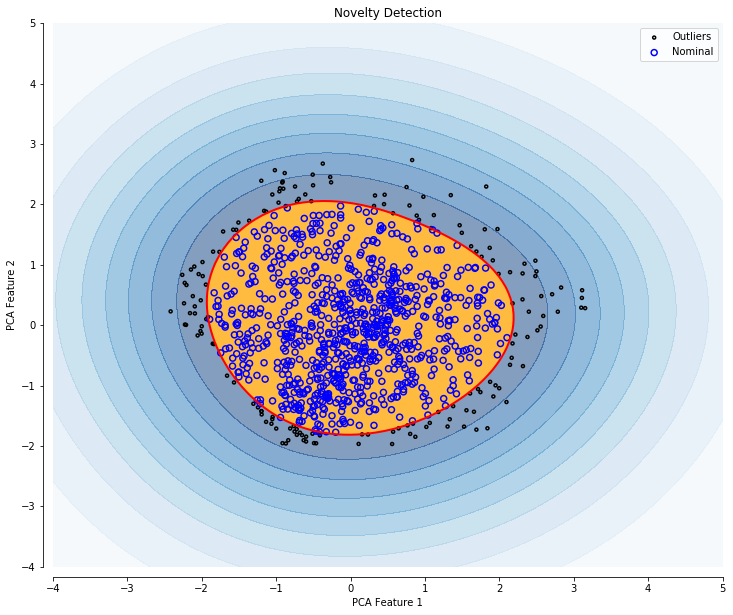

In [44]:
# Create figure
fig, ax = plt.subplots(figsize=(12, 10))

# Draw contours for SVC decision surface
ax.contourf(x_mesh, y_mesh, z, levels=np.linspace(z.min(), 0, 10), 
             cmap=plt.cm.Blues, alpha=0.5)

# Colorize central region where data are marked good
ax.contourf(x_mesh, y_mesh, z, levels=[0, z.max()], 
             colors='orange', alpha=0.75)

# Draw contour line for boundary and set label
ax.contour(x_mesh, y_mesh, z, levels=[0], linewidths=2, colors='red', label="Learned Boundary")

df = pd.DataFrame(new_data, columns=["x", "y"])
df['p'] = predictions

ax.scatter(df[df.p < 0].x, df[df.p < 0].y,
                 marker='.', facecolor='none', edgecolor='black',
                 linewidth=1.5, linestyle='-',
                label='Outliers')

ax.scatter(df[df.p > 0].x, df[df.p > 0].y,
                 marker='o', facecolor='none', edgecolor='blue',
                 linewidth=1.5, linestyle='-',
                label='Nominal')

# Decorate plot
ax.set(title='Novelty Detection', 
        xlabel='PCA Feature 1', ylabel='PCA Feature 2')
ax.legend()
sns.despine(offset=10, trim=True)